## Parse result from evaluation

In [ ]:
import os
import json
import glob
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import permutations 

DIGIT_MAPPING = {
    0: 'zero',
    1: 'one',
    2: 'two',
    3: 'three',
    4: 'four',
    5: 'five',
    6: 'six',
    7: 'seven',
    8: 'eight',
    9: 'nine'
}

### Concatenate the result of digits in each loop

In [2]:
def concate_result(files, loop, store=False):
    data = {
        'phase': [],
        'eer': [],
        'gender': [],
        'minDCF': [],
        'text': [],
        'loop': [],
        'word': []
        }
    parse = files[0].split('/')
    path = '/'.join(parse[:-2])
    for file in files:
        res = json.load(open(file, 'r'))
        splits = file.split('/')
        if 'eval' in splits[-1]:
            phase = 'eval'
        if 'dev' in splits[-1]:
            phase = 'dev'
        if 'all' in splits[-1]:
            phase ='eval'
        text = splits[-2]
        word = text.split('_')[0]
        
        for g in res:
            data['gender'].append(g)
            data['eer'].append(res[g]['eer'])
            data['minDCF'].append(res[g]['minDCF'])
            data['phase'].append(phase)
            data['text'].append(text)
            data['loop'].append(loop)
            data['word'].append(word)
    df = pd.DataFrame(data)
    if store:
        save_path = os.path.join(path, 'all_eval_results.csv')
        print('Save result to %s' % (save_path))
        df.to_csv(save_path, index=False)
    return df

In [4]:
for l in [0,1,2,3,4]:
    # if l == 0:
    #     result_files = glob.glob('checkpoints/non_pretrained/channel_1024_old/exp3/loop%s/*/all_results.json' %(l+1))
    #     # + glob.glob('vox_result/loop%s/*/all_eval_results_experiment_no_tw.json' %(l+1))
    #     df = concate_result(result_files,l+1,store=True)
    # else:
        result_files = glob.glob('checkpoints/pretrained/channel_64/exp3/loop%s/*/all_eval_result.json' %(l+1))
        # + glob.glob('vox_result/loop%s/*/all_eval_results_experiment_no_tw.json' %(l+1))
        df = concate_result(result_files,l+1,store=True)

Save result to checkpoints/pretrained/channel_64/exp3/loop1/all_eval_results.csv
Save result to checkpoints/pretrained/channel_64/exp3/loop2/all_eval_results.csv
Save result to checkpoints/pretrained/channel_64/exp3/loop3/all_eval_results.csv
Save result to checkpoints/pretrained/channel_64/exp3/loop4/all_eval_results.csv
Save result to checkpoints/pretrained/channel_64/exp3/loop5/all_eval_results.csv


In [9]:
def plot_result(df_all, gender, phase, loop):
    import matplotlib.pyplot as plt
    result = df_all[(df_all['phase'] == phase) & (df_all['gender'] == gender)].sort_values('word')
    # print(result) 
    text = [str(x) for x in range(0,10)]
    plt.figure(figsize=(12,6))
    plt.suptitle('%s - Iteration %s' % (gender, loop))

    plt.subplot(1,2,1)
    plt.bar(text, result['minDCF'],0.4, label='minDCF')
    plt.xticks(ticks=text)
    plt.xlabel('Text')
    plt.ylabel('minDCF')
    
    plt.subplot(1,2,2)
    plt.bar(text, result['eer'],0.4, label='EER')
    plt.xticks(ticks=text)
    plt.xlabel('Text')
    plt.ylabel('EER (%)')
    plt.show()
    

In [2]:
def get_result(data,max_loop=3):
    result = {
    }
    genders = ['female', 'male', 'all']
    phases = ['eval']
    words = [x for x in range(0,10)]
    for phase in phases:
        result[phase] = {}
        for gender in genders:
            result[phase][gender] = {
                'eer': {},
                'minDCF': {},
            }
            for word in words:
                df = data[(data['phase'] == phase) & (data['gender'] == gender) & (data['word']==word)]
                # print(data['word'])
                # print(df)
                result[phase][gender]['eer'][word] = df['eer'].to_list()
                result[phase][gender]['minDCF'][word] = df['minDCF'].to_list()
    return result

                

    

In [13]:
def get_result_2(data,max_loop=3):
    result = {
    }
    genders = ['female', 'male', 'all']
    phases = ['eval']
    # words = [x for x in range(0,10)]
    from itertools import permutations
    words = list(permutations(['9', '6', '3', '0','1'],r=2))
    words = ['_'.join(list(pair)) for pair in words]
    for phase in phases:
        result[phase] = {}
        for gender in genders:
            result[phase][gender] = {
                'eer': {},
                'minDCF': {},
            }
            for word in words:
                df = data[(data['phase'] == phase) & (data['gender'] == gender) & (data['word']==word)]
                # print(data['word'])
                # print(df)
                result[phase][gender]['eer'][word] = df['eer'].to_list()
                result[phase][gender]['minDCF'][word] = df['minDCF'].to_list()
    return result


In [ ]:
result = get_result_2()

In [30]:
json.dump(result, open('experiment_checkpoints/result_evals_tuning_2.json', 'w'))

In [53]:
df_all = pd.DataFrame()
MAX_LOOP = 5
for loop in range(1,MAX_LOOP+1):
    # if loop == 1:
    #     df_all = pd.concat([df_all, pd.read_csv('checkpoints/pretrained/channel_1024/exp1/loop%s/all_eval_results_tuning_2.csv'%(loop))], ignore_index=True)
    # else:
        df_all = pd.concat([df_all, pd.read_csv('checkpoints/non_pretrained/channel_1024_old/exp1/loop%s/all_eval_results_real_data.csv'%(loop))], ignore_index=True)
result = get_result(df_all, max_loop=1)

In [54]:
df_all

phase        eer gender    minDCF       text  loop  word
0   eval  13.450292   male  0.596491          0     1     0
1   eval  15.000000   male  0.405556          3     1     3
2   eval  17.777778   male  0.505556          6     1     6
3   eval   5.555556   male  0.344444          1     1     1
4   eval  19.444444   male  0.755556          5     1     5
5   eval  10.555556   male  0.427778          9     1     9
6   eval  14.444444   male  0.508333          2     1     2
7   eval   9.444444   male  0.458333          4     1     4
8   eval  12.222222   male  0.333333          7     1     7
9   eval  20.000000   male  0.538889          8     1     8
10  eval   6.666667   male  0.316667        9_9     2     9
11  eval  17.500000   male  0.375000        6_6     2     6
12  eval   6.111111   male  0.230556        7_7     2     7
13  eval   2.777778   male  0.216667        3_3     2     3
14  eval  10.000000   male  0.283333        8_8     2     8
15  eval   3.888889   male  0.169444        1_1     2     1
16  eval   5.000000   male  0.350000        2_2     2     2
17  eval   6.666667   male  0.227778        4_4     2     4
18  eval  12.222222   male  0.416667        5_5     2     5
19  eval   6.944444   male  0.275000        0_0     2     0
20  eval   4.444444   male  0.350000      9_9_9     3     9
21  eval   3.888889   male  0.244444      0_0_0     3     0
22  eval   6.111111   male  0.216667      2_2_2     3     2
23  eval   5.555556   male  0.463889      6_6_6     3     6
24  eval   4.722222   male  0.158333      1_1_1     3     1
25  eval  11.944444   male  0.400000      3_3_3     3     3
26  eval   2.777778   male  0.350000      7_7_7     3     7
27  eval  10.555556   male  0.283333      5_5_5     3     5
28  eval   2.631579   male  0.204678      4_4_4     3     4
29  eval   3.055556   male  0.172222      8_8_8     3     8
30  eval  12.777778   male  0.394444    2_2_2_2     4     2
31  eval   8.888889   male  0.288889    9_9_9_9     4     9
32  eval   2.631579   male  0.169591    7_7_7_7     4     7
33  eval   8.888889   male  0.311111    3_3_3_3     4     3
34  eval   2.777778   male  0.236111    0_0_0_0     4     0
35  eval   5.000000   male  0.202778    5_5_5_5     4     5
36  eval   1.666667   male  0.219444    6_6_6_6     4     6
37  eval   4.294479   male  0.303681    8_8_8_8     4     8
38  eval   1.666667   male  0.088889    1_1_1_1     4     1
39  eval   2.222222   male  0.050000    4_4_4_4     4     4
40  eval   4.444444   male  0.111111  1_1_1_1_1     5     1
41  eval  10.833333   male  0.366667  5_5_5_5_5     5     5
42  eval   5.833333   male  0.519444  4_4_4_4_4     5     4
43  eval  11.666667   male  0.300000  3_3_3_3_3     5     3
44  eval   2.777778   male  0.277778  6_6_6_6_6     5     6
45  eval   3.888889   male  0.155556  2_2_2_2_2     5     2
46  eval   6.111111   male  0.227778  8_8_8_8_8     5     8
47  eval   2.777778   male  0.100000  7_7_7_7_7     5     7
48  eval   2.777778   male  0.152778  0_0_0_0_0     5     0
49  eval  10.810811   male  0.360360  9_9_9_9_9     5     9

In [55]:
name = '1024_non-pretrained_exp1'
df_all.to_csv('sync_result/real_data/temp/%s.csv'%name, index=False)
json.dump(result, open('sync_result/real_data/temp/%s.json'%name, 'w'))

In [59]:
def show_result(result, metric='eer',all=False, start_loop=1, end_loop=5):
    if all:
        genders = ['overall']
    else:
        genders =  ['female','male','all']
    for gender in genders:
        # plt.figure(figsize=(12,4))
        name_set = list(result.keys())
        a = []
        # for v in result['dev'][gender][metric].values():
        #     a.extend(v)
        for v in result['eval'][gender][metric].values():
            a.extend(v)
        if len(a) == 0:
            continue
        min_ = min(a)
        max_ = max(a)
        for idx,set in enumerate(name_set):
            ax = plt.subplot(len(name_set),1,idx+1)
            set_result = result[set]
            for i in range(0,10):
                try:
                    ax.plot([j for j in range(start_loop, end_loop+1)],set_result[gender][metric][i])
                except:
                    ax.plot([j for j in range(start_loop, end_loop+1)],set_result[gender][metric][str(i)])

            # box = ax.get_position()
            # ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
            plt.xticks([ i for i in range(start_loop,end_loop+1)])
            plt.xlabel('The times of iteration')
            plt.ylim((min_-1,max_+1))
            plt.ylabel('EER (%)')
            plt.title(gender.capitalize())
        plt.legend([DIGIT_MAPPING[i] for i in range(0,10)], loc='upper right', bbox_to_anchor=(1.15, 1))
        # plt.savefig('results/output_exp1_%s.png'%(gender))

In [119]:
result = {}
# result['0'] = json.load(open('real_data_result/fake/real_data_and_fake_data_tuning_loop1.json', 'r'))
result['1'] = json.load(open('sync_result/pretrain/1024_pretrained_exp1.json', 'r'))
result['2'] = json.load(open('sync_result/pretrain/1024_pretrained_exp2.json', 'r'))
result['3'] = json.load(open('sync_result/pretrain/1024_pretrained_exp3.json', 'r'))


In [121]:
MAX_LOOP = 5
phases = ['eval']
metrics = ['eer', 'minDCF']
genders = ['female', 'male', 'all']
final_result = {}
# word = {}
for phase in phases:
    final_result[phase] = {}
    # word[phase] = {}
    for gender in genders:
        final_result[phase][gender] = {}
        # word[phase][gender] = {}
        for metric in metrics:
            final_result[phase][gender][metric] = {}
            # word[phase][gender][metric] = {}
            for i in range(0,10):
                temp = []
                for exp in result:
                    if exp == '0':
                        continue
                    temp.append(result[exp][phase][gender][metric][str(i)][:MAX_LOOP])
                value = np.mean(temp, axis=0)
                final_result[phase][gender][metric][i] = list(value)
                # final_result[phase][gender][metric][i] = result['0'][phase][gender][metric][str(i)] + list(value)
                # word[phase][gender][metric][i] = value[0]






In [122]:
final_results = final_result

In [123]:
start_loop = 1
end_loop = 5
genders =  ['female', 'male', 'all']
metric = 'eer'

for num, final_result in enumerate(final_result):
    # fig = plt.figure(figsize=(20,4))
    # plt.subplots_adjust(left=0.1,
    #                     bottom=0.1,
    #                     right=0.8,
    #                     top=1.5,
    #                     wspace=0.2,
    #                     hspace=0.4)
    # spec = fig.add_gridspec(2, 2)
    a = []
    for gender in genders:
        for v in final_result['eval'][gender][metric].values():
                a.extend(v)
        if len(a) == 0:
            continue
        min_ = min(a)
        max_ = max(a)

    for _, gender in enumerate(genders):
        # plt.figure(figsize=(12,4))
        name_set = list(final_result.keys())
        # for v in result['dev'][gender][metric].values():
        #     a.extend(v)
        # if gender=='all':
            # ax = plt.subplot2grid((2,4),(1,1), colspan=2)
        # ax = fig.add_subplot(2,3,i + 1)
        fig = plt.figure(figsize=(8,4))
        ax = fig.add_subplot(111)
            # ax.set_adjustable('box'=[1.5,1.5,6,4])
        # if gender == 'female':
            # ax = plt.subplot2grid((2,4),(0,0), colspan=2)
        # fig = plt.figure(figsize=(12,6))
        # ax = fig.add_subplot(111)
        
        # if gender == 'male':
            # ax = plt.subplot2grid((2,4),(0,2), colspan=2)
        for idx,set in enumerate(name_set):
            set_result = final_result[set]
            # print(set_result[gender][metric])
            for i in range(0,10):
                try:
                    ax.plot([j for j in range(start_loop, end_loop+1)],set_result[gender][metric][i])
                except:
                    ax.plot([j for j in range(start_loop, end_loop+1)],set_result[gender][metric][str(i)])

            # box = ax.get_position()
            # ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
        ax.set_xticks([ i for i in range(start_loop,end_loop+1)])
        ax.set_xlabel('The number of repetitions')
        ax.set_ylim((min_-0.5,max_+0.5))
        if metric == 'eer':
            y_label = 'EER (%)'
        else:
            y_label = 'minDCF'

        ax.set_ylabel(y_label)
        ax.set_title(gender.capitalize())
        # ax.legend([DIGIT_MAPPING[i] for i in range(0,10)], loc='upper left', ncol=1, bbox_to_anchor=[1,1], title='Text')
        plt.legend([DIGIT_MAPPING[i] for i in range(0,10)], loc='upper left', ncol=1, bbox_to_anchor=[1,1], title='Text')
plt.show()

TypeError: string indices must be integers

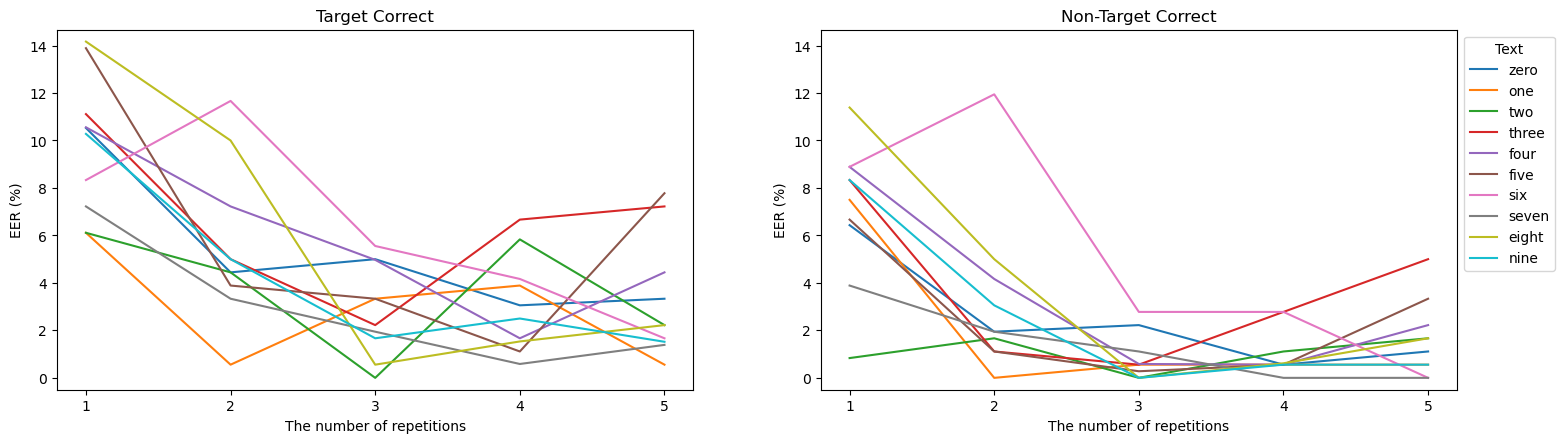

In [15]:
final_results = [#json.load(open('real_data_result/fake/real_data_and_fake_data_tuning.json', 'r'))]
                 json.load(open('pruning_checkpoints/exp1/results_on_real_data.json', 'r')),
                 json.load(open('pruning_checkpoints/exp1/results_on_real_data_no_tw.json', 'r'))]
result_labels = ['Target Correct', 'Non-Target Correct']
start_loop = 1
end_loop = 5
genders =  ['male']
metric = 'eer'

a = []
for final_result in final_results:
    
    for gender in genders:
        for v in final_result['eval'][gender][metric].values():
                a.extend(v)
        if len(a) == 0:
            continue
        min_ = min(a)
        max_ = max(a)
fig = plt.figure(figsize=(20,4))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.8,
                    top=1,
                    wspace=0.2,
                    hspace=0.4)
# spec = fig.add_gridspec(2, 2)
for case_idx, final_result in enumerate(final_results):
    ax = fig.add_subplot(1,2,case_idx+1)
    for i, gender in enumerate(genders):
        # plt.figure(figsize=(12,4))
        name_set = list(final_result.keys())
        # for v in result['dev'][gender][metric].values():
        #     a.extend(v)
        # if gender=='all':
            # ax = plt.subplot2grid((2,4),(1,1), colspan=2)
        # 
            # ax.set_adjustable('box'=[1.5,1.5,6,4])
        # if gender == 'female':
            # ax = plt.subplot2grid((2,4),(0,0), colspan=2)
        # fig = plt.figure(figsize=(12,6))
        # ax = fig.add_subplot(111)
        
        # if gender == 'male':
            # ax = plt.subplot2grid((2,4),(0,2), colspan=2)
        for idx,set in enumerate(name_set):
            set_result = final_result[set]
            # print(set_result[gender][metric])
            for i in range(0,10):
                try:
                    ax.plot([j for j in range(start_loop, end_loop+1)],set_result[gender][metric][i])
                except:
                    ax.plot([j for j in range(start_loop, end_loop+1)],set_result[gender][metric][str(i)])

            # box = ax.get_position()
            # ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
        ax.set_xticks([ i for i in range(start_loop,end_loop+1)])
        ax.set_xlabel('The number of repetitions')
        ax.set_ylim((min_-0.5,max_+0.5))
        if metric == 'eer':
            y_label = 'EER (%)'
        else:
            y_label = 'minDCF'

    ax.set_ylabel(y_label)
    ax.set_title(result_labels[case_idx])
# plt.legend([DIGIT_MAPPING[i] for i in range(0,10)], loc='lower center', ncol=1, bbox_to_anchor=[0.5,-0.5], title='Text')
ax.legend([DIGIT_MAPPING[i] for i in range(0,10)], loc='upper left', ncol=1, bbox_to_anchor=[1,1], title='Text')
plt.show()

# Compare 6-6 to other

In [40]:
from itertools import permutations 
df_all = pd.DataFrame()
# files = glob.glob('experiment_checkpoints/*/all_eval_results_tuning_2.csv')
files = glob.glob('checkpoints/pretrained/channel_1024_new_data/experiment_checkpoints/exp3/all_eval_results_new_data_2.csv')
for file in files:
    df_all = pd.concat([df_all, pd.read_csv(file)], ignore_index=True)
result = {
    }
genders = ['female', 'male', 'all']
phases = ['eval']
words = list(permutations(['9', '6', '3', '0','1'],r=2))
for phase in phases:
    result[phase] = {}
    for gender in genders:
        result[phase][gender] = {
            'eer': {},
            'minDCF': {},
        }
        for word in words:
            text = [str(w) for w in word]
            text = '_'.join(text)
            df = df_all[(df_all['phase'] == phase) & (df_all['gender'] == gender) & (df_all['text']==text)]
            # print(data['word'])
            result[phase][gender]['eer'][text] = np.mean(df['eer'].to_list())
            result[phase][gender]['minDCF'][text] = np.mean(df['minDCF'].to_list())


In [41]:
result

{'eval': {'female': {'eer': {'9_6': 11.034013605442173,
    '9_3': 11.142857142857142,
    '9_0': 12.34013605442177,
    '9_1': 10.7,
    '6_9': 11.306666666666668,
    '6_3': 9.551020408163268,
    '6_0': 10.713333333333331,
    '6_1': 11.153333333333332,
    '3_9': 10.312925170068032,
    '3_6': 9.795918367346934,
    '3_0': 13.54,
    '3_1': 10.126666666666669,
    '0_9': 11.933333333333334,
    '0_6': 9.666666666666666,
    '0_3': 12.0,
    '0_1': 15.40136054421769,
    '1_9': 9.401360544217685,
    '1_6': 11.700680272108844,
    '1_3': 9.98639455782313,
    '1_0': 12.2},
   'minDCF': {'9_6': 0.8394666666666665,
    '9_3': 0.8687496598639463,
    '9_0': 0.8447129251700691,
    '9_1': 0.841632653061224,
    '6_9': 0.8697591836734692,
    '6_3': 0.7633088435374141,
    '6_0': 0.7772380952380947,
    '6_1': 0.8551741496598644,
    '3_9': 0.8922326530612252,
    '3_6': 0.7648761904761894,
    '3_0': 0.8441183673469393,
    '3_1': 0.9044585034013604,
    '0_9': 0.8910013605442176,
    '

In [42]:
json.dump(result, open('sync_result/pretrain/1024_experiment_exp3.json','w'))

In [16]:
final_results = json.load(open('pruning_checkpoints/exp1/results_loop1_loop5.json', 'r'))

In [24]:

# array = []
# for i in range(0,10):
#     temp = []
#     for gender in ['female','male','all']:
#         temp.append(final_result['eval'][gender]['eer'][str(i)][0])
#     array.append(temp)
#     print(temp)
# avg = np.mean(array,axis=1)
# avg # 1 3 6 9

[6.1, 6.894557823129254, 7.725333333333332]
[10.413333333333332, 7.734693877551024, 8.512]
[7.795918367346943, 10.26, 9.652]
[6.453333333333333, 8.670068027210887, 8.265333333333333]
[10.612244897959188, 8.596666666666666, 9.014965986394564]
[9.866666666666667, 6.1033333333333335, 7.219047619047614]
[5.28, 7.47959183673469, 7.257333333333333]
[4.217687074829934, 8.163265306122447, 8.114285714285717]
[6.013605442176873, 8.860544217687071, 8.6]
[7.813333333333333, 6.180272108843532, 6.864000000000001]


array([6.90663039, 8.88667574, 9.23597279, 7.7962449 , 9.40795918,
       7.72968254, 6.67230839, 6.83174603, 7.82471655, 6.95253515])

In [25]:
# dir = {}
# for i in range(len(avg)):
#     dir[i] = avg[i]
# {k: v for k, v in sorted(dir.items(), key=lambda item: item[1])}

{6: 6.672308390022674,
 7: 6.831746031746033,
 0: 6.906630385487529,
 9: 6.952535147392289,
 5: 7.729682539682538,
 3: 7.796244897959184,
 8: 7.824716553287981,
 1: 8.886675736961452,
 2: 9.235972789115648,
 4: 9.407959183673473}

In [11]:
# final_result = json.load(open('final_results/average_pretrained_diff_index.json', 'r'))
# final_result = json.load(open('vox_result/results_no_tw_loop1_loop5.json', 'r'))

In [27]:
keys = ['0','1', '3', '6', '9']
filter = {}
for gender in ['female', 'male', 'all']:
    filter[gender] = {} 
    filter[gender]['eer'] = {}
    filter[gender]['minDCF'] = {}
    for digit in keys:
        filter[gender]['eer'][digit + '_' + digit] = final_result['eval'][gender]['eer'][digit][1]
        filter[gender]['minDCF'][digit +  '_' + digit] = final_result['eval'][gender]['minDCF'][digit][1]

In [28]:
filter

{'female': {'eer': {'0_0': 2.380952380952384,
   '1_1': 2.286666666666666,
   '3_3': 1.2733333333333332,
   '6_6': 0.6530612244897926,
   '9_9': 2.204081632653065},
  'minDCF': {'0_0': 0.1198585034013604,
   '1_1': 0.1550911564625847,
   '3_3': 0.0607877551020416,
   '6_6': 0.04711156462585,
   '9_9': 0.1826285714285719}},
 'male': {'eer': {'0_0': 2.305,
   '1_1': 3.235,
   '3_3': 3.663265306122454,
   '6_6': 2.1802721088435395,
   '9_9': 2.2333333333333334},
  'minDCF': {'0_0': 0.1729724489795909,
   '1_1': 0.1925993197278911,
   '3_3': 0.1969965986394561,
   '6_6': 0.1590428571428562,
   '9_9': 0.1372023809523808}},
 'all': {'eer': {'0_0': 2.7129251700680257,
   '1_1': 3.8866666666666663,
   '3_3': 3.264,
   '6_6': 2.0326530612244875,
   '9_9': 2.4979591836734705},
  'minDCF': {'0_0': 0.1765140136054428,
   '1_1': 0.2441349659863937,
   '3_3': 0.1716650340136045,
   '6_6': 0.1352160544217691,
   '9_9': 0.1713817687074821}}}

In [29]:
for gender in ['female', 'male', 'all']:
    filter[gender]['eer'].update(result['eval'][gender]['eer'])
    filter[gender]['minDCF'].update(result['eval'][gender]['minDCF'])
    

In [36]:
# filter = json.load(open('pretrained_checkpoints/word_final.json','r'))['eval']
# filter = json.load(open('vox_result/results_no_tw_loop1_loop5.json','r'))['eval']
# filter = json.load(open('non_pretrained_checkpoints/word_final.json','r'))['eval']
# data_vis = dict(sorted(filter[gender][metric].items(), key=lambda item: item[1]))
# data_vis

In [49]:
filter = json.load(open('pruning_checkpoints/exp1/word_final.json', 'r'))
filter = filter['eval']

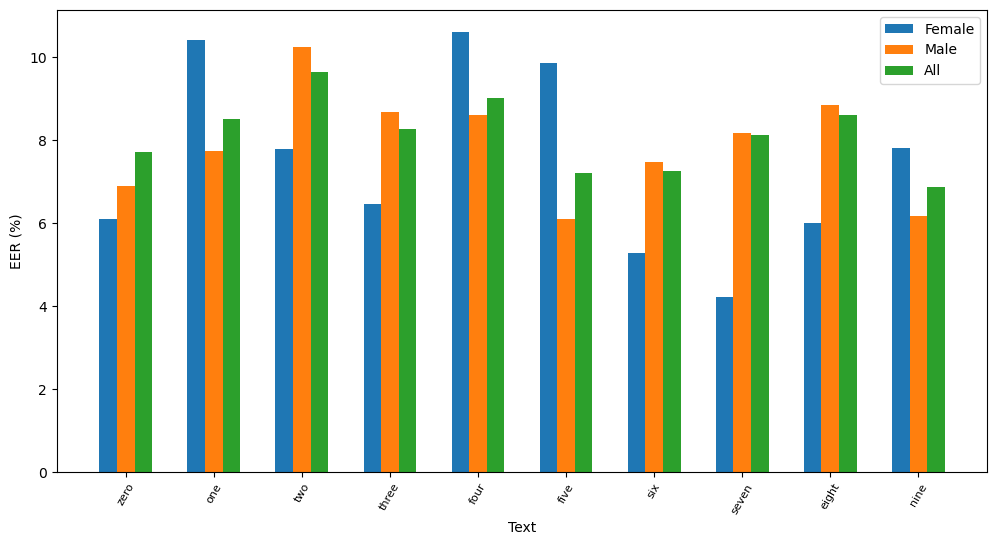

In [50]:
param = [-0.2, 0, +0.2]
plt.figure(figsize=(12,6))
# data_vis = dict(sorted(filter[gender][metric].items(), key=lambda item: item[1]))
plt.bar(np.arange(len(filter['female']['eer'])) - 0.2, list(filter['female']['eer'].values()),width=0.2)
plt.bar(np.arange(len(filter['male']['eer'])), list(filter['male']['eer'].values()),width=0.2)
plt.bar(np.arange(len(filter['all']['eer']))  +0.2, list(filter['all']['eer'].values()),width=0.2)
plt.xlabel('Text')
plt.ylabel('EER (%)')
plt.legend(['Female', 'Male', 'All'])
plt.xticks(ticks=range(len(filter['female']['eer'])),labels=[ '_'.join([DIGIT_MAPPING[int(i)] for i in text.split('_')]) for text in list(filter['female']['eer'].keys())],fontsize=8, rotation=60)
plt.show()
        # plt.savefig('experiment_checkpoints/%s.png' % (gender))

In [31]:
json.dump(filter, open('pruning_checkpoints/exp1/loop2_experiments/result_final.json', 'w'))

In [4]:
metrics = ['eer', 'minDCF']
words = ['6', '6_6']
result = {}
for gender in ['male','female','all']:
    result[gender] = {}
    for w in words:
        files = glob.glob('real_test/%s_*.json'%(w))
        if len(files) > 0:
            sum_eer = 0
            sum_minDCF = 0
            for file in files:
                scores = json.load(open(file))
                sum_eer += scores[gender]['eer']
                sum_minDCF += scores[gender]['minDCF']
            avg_eer = sum_eer / len(files)
            avg_minDCF = sum_minDCF / len(files)
            result[gender][w] = {'eer': avg_eer, 'minDCF':avg_minDCF}

## Gender dependent

In [56]:
PATH = 'sync_result'

In [57]:
channels = [1024,128,64]
techniques = ['non_pretrain', 'pretrain']
result = {}
for gender in ['all', 'female', 'male']:
    result[gender] = {}
    for c in channels:
        for tech in techniques:
            key = '%s_%s' % (c, tech)
            if tech == 'non_pretrain':
                files = glob.glob(os.path.join(PATH, tech, "%s_%s_exp*.csv"%(c,'non-pretrained')))
            else:
                files = glob.glob(os.path.join(PATH, tech, "%s_%s_exp*.csv"%(c,'pretrained')))
            df = pd.DataFrame()
            for f in files:
                df = pd.concat([df, pd.read_csv(f)], ignore_index=True)

            result[gender][key] = df.groupby(['phase', 'gender', 'loop'])['eer'].mean()['eval'][gender].to_list()    




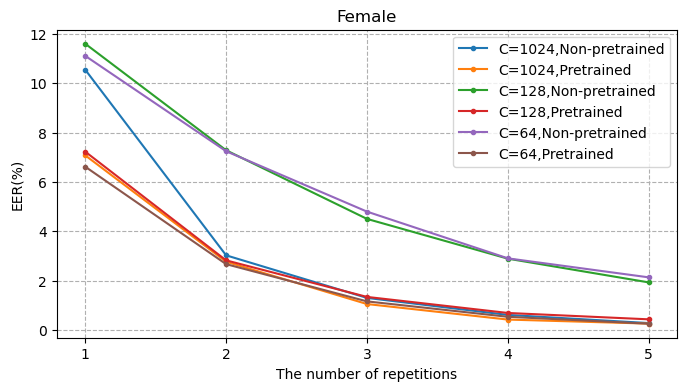

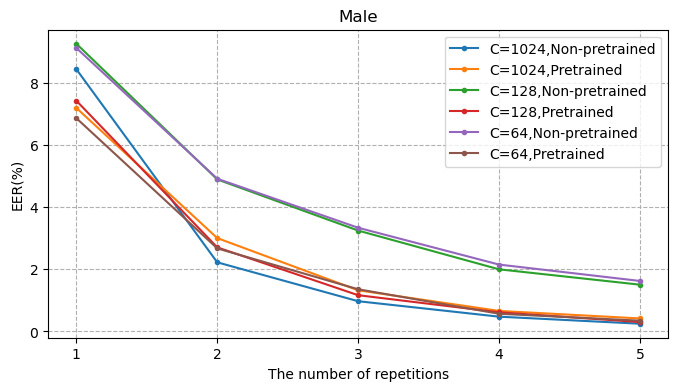

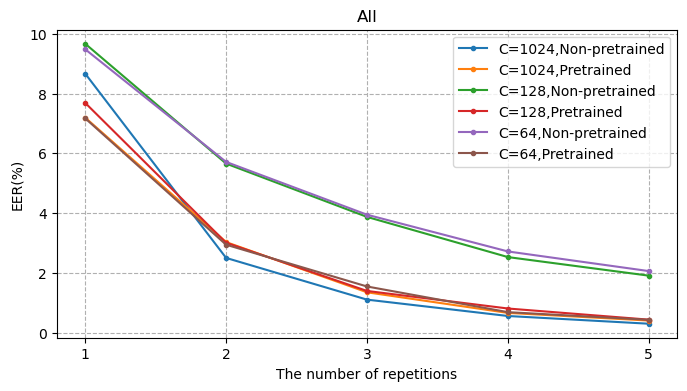

In [58]:
for gender in ['female', 'male', 'all']:
    data = result[gender]
    legends = []
    fig = plt.figure(figsize=(8,4))
    ax = fig.add_subplot(111)
    for k in data:
        leg = 'C=%s,%s'
        if 'non_pretrain' in k:
            tech_str = 'Non-pretrained'
        else:
            tech_str = 'Pretrained'
        
        C = k.split('_')[0]
        legends.append(leg%(C,tech_str))
        ax.plot([loop for loop in range(1,6)],data[k],marker='.')
    plt.title(gender.capitalize())
    plt.ylabel('EER(%)')
    plt.xlabel('The number of repetitions')
    plt.xticks([loop for loop in range(1,6)])
    plt.legend(legends)
    plt.grid(linestyle='--')
    plt.savefig('sync_result/new_images/comparison_%s.png'%(gender),bbox_inches='tight')
    plt.show()
    



## Gender independent

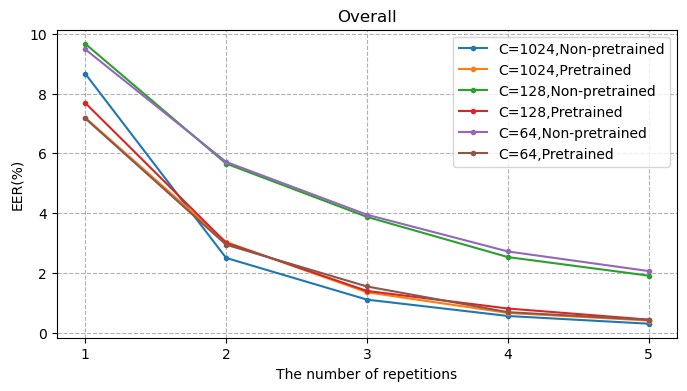

In [59]:
channels = [1024,128,64]
techniques = ['non_pretrain', 'pretrain']
result = {}
for c in channels:
    for tech in techniques:
        key = '%s_%s' % (c, tech)
        if tech == 'non_pretrain':
                files = glob.glob(os.path.join(PATH, tech, "%s_%s_exp*.csv"%(c,'non-pretrained')))
        else:
            files = glob.glob(os.path.join(PATH, tech, "%s_%s_exp*.csv"%(c,'pretrained')))
        df = pd.DataFrame()
        for f in files:
            df = pd.concat([df, pd.read_csv(f)], ignore_index=True)

        result[key] = df.groupby(['phase', 'gender', 'loop'])['eer'].mean()['eval'][gender].to_list()
legends = []
data = result
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
for k in data:
    leg = 'C=%s,%s'
    if 'non_pretrain' in k:
        tech_str = 'Non-pretrained'
    else:
        tech_str = 'Pretrained'
    
    C = k.split('_')[0]
    legends.append(leg%(C,tech_str))
    ax.plot([loop for loop in range(1,6)],data[k],marker='.')
plt.title('Overall')
plt.ylabel('EER(%)')
plt.xlabel('The number of repetitions')
plt.xticks([loop for loop in range(1,6)])
plt.legend(legends)
plt.grid(linestyle='--')
plt.savefig('sync_result/new_images/comparison_overall.png',bbox_inches='tight')
plt.show()


# Visualization

In [2]:
def compute_average_result(files, type='json'):
    assert type in ['json', 'dataframe']
    if type == 'dataframe':
        df = pd.DataFrame()
        for f in files:
            df = pd.concat([df, pd.read_csv(f)], ignore_index=True)
        
            average = df.groupby(['phase', 'gender', 'text']).mean()

        return average
    elif type == 'json':
            result = {}
            for i, f in enumerate(files):
                result[i] = json.load(open(f,'r'))
            phases = ['eval']
            metrics = ['eer', 'minDCF']
            genders = ['female', 'male', 'all']
            final_result = {}
            # word = {}
            for phase in phases:
                final_result[phase] = {}
                # word[phase] = {}
                for gender in genders:
                    final_result[phase][gender] = {}
                    # word[phase][gender] = {}
                    for metric in metrics:
                        final_result[phase][gender][metric] = {}
                        # word[phase][gender][metric] = {}
                        for i in result[0][phase][gender][metric]:
                            temp = []
                            for exp in result:
                                try:
                                    temp.append(result[exp][phase][gender][metric][i])
                                except:
                                    temp.append(result[exp][phase][gender][metric][str(i)])
                            value = np.mean(temp, axis=0)
                            try:
                                final_result[phase][gender][metric][i] = list(value)
                            except: 
                                final_result[phase][gender][metric][i] = value
            return final_result            
    
    return None

In [3]:
def visualize_result(final_result,
                    path_to_save=None,
                    start_loop=1,
                    end_loop = 5,
                    genders =  ['female', 'male', 'all'],
                    metric = 'eer',
                    limit=True):
    if limit:
        a = []
        for gender in genders:
            for v in final_result['eval'][gender][metric].values():
                    a.extend(v)
            if len(a) == 0:
                continue
            min_ = min(a)
            max_ = max(a)

    for _, gender in enumerate(genders):
        # plt.figure(figsize=(12,4))
        name_set = list(final_result.keys())
        fig = plt.figure(figsize=(8,4))
        ax = fig.add_subplot(111)
        for idx,set in enumerate(name_set):
            set_result = final_result[set]
            # print(set_result[gender][metric])
            for i in range(0,10):
                try:
                    ax.plot([j for j in range(start_loop, end_loop+1)],set_result[gender][metric][i])
                except:
                    ax.plot([j for j in range(start_loop, end_loop+1)],set_result[gender][metric][str(i)])
        ax.set_xticks([ i for i in range(start_loop,end_loop+1)])
        ax.set_xlabel('The number of repetitions')
        if limit:
            ax.set_ylim((min_-0.5,max_+0.5))
        if metric == 'eer':
            y_label = 'EER (%)'
        else:
            y_label = 'minDCF'

        ax.set_ylabel(y_label)
        ax.set_title(gender.capitalize())
        ax.grid(linestyle='--')
        # ax.legend([DIGIT_MAPPING[i] for i in range(0,10)], loc='upper left', ncol=1, bbox_to_anchor=[1,1], title='Text')
        plt.legend([DIGIT_MAPPING[i] for i in range(0,10)], loc='upper left', ncol=1, bbox_to_anchor=[1,1], title='Text')
        if path_to_save is not None:
            plt.savefig(path_to_save + '_%s.png'%(gender), bbox_inches='tight')
        plt.show()
        

sync_result/images/1024_non_pretrain
1024_non_pretrain


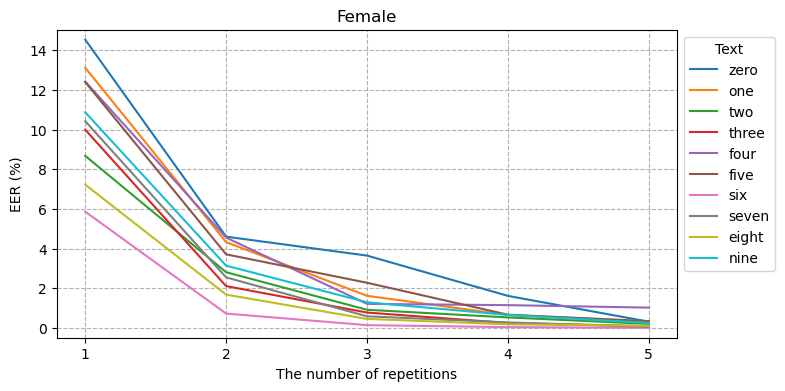

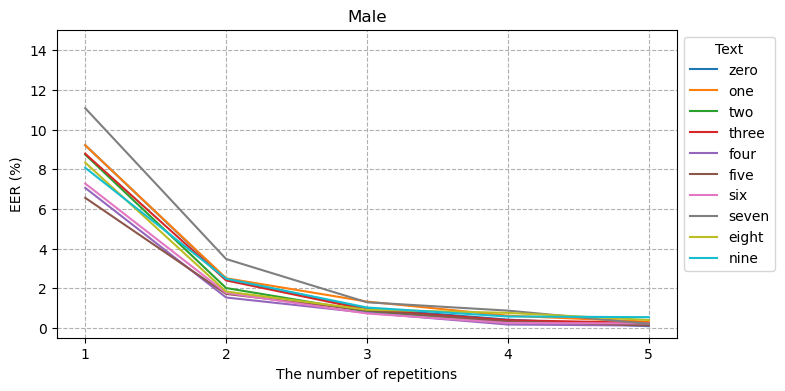

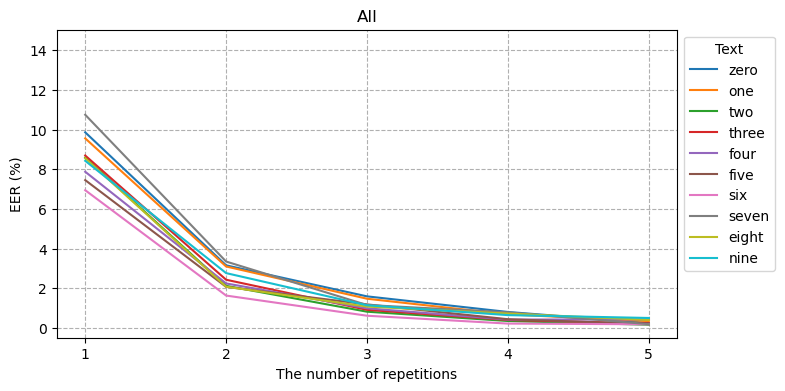

sync_result/images/1024_pretrain
1024_pretrain


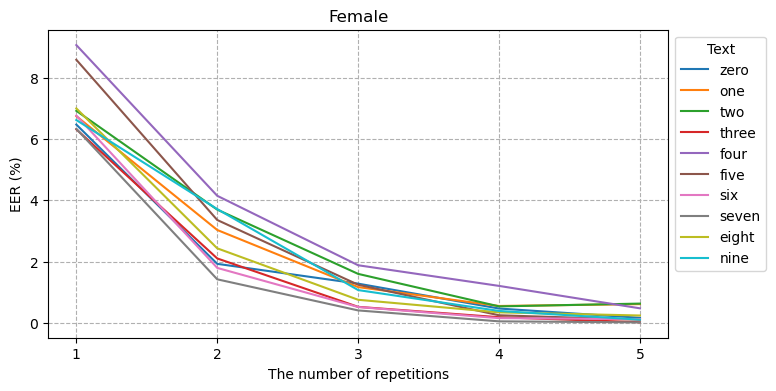

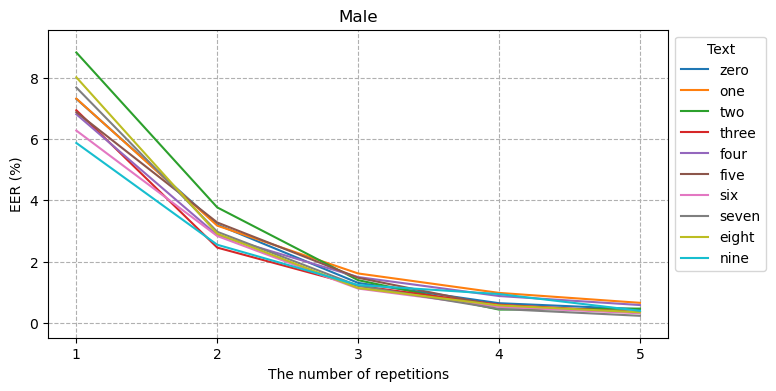

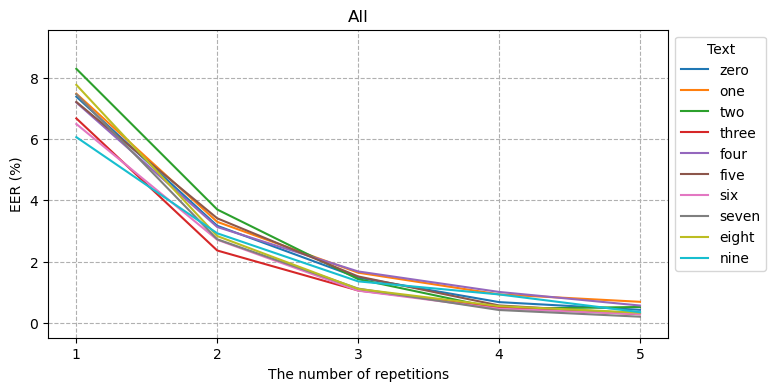

sync_result/images/128_non_pretrain
128_non_pretrain


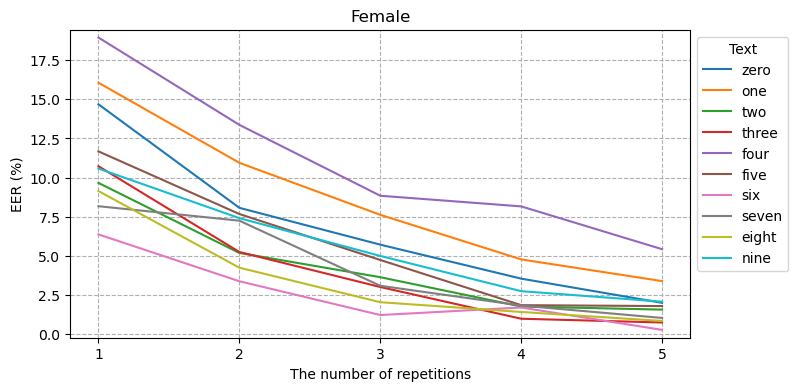

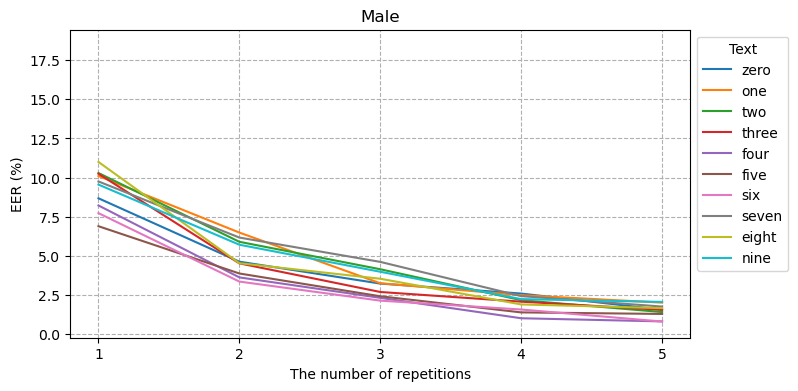

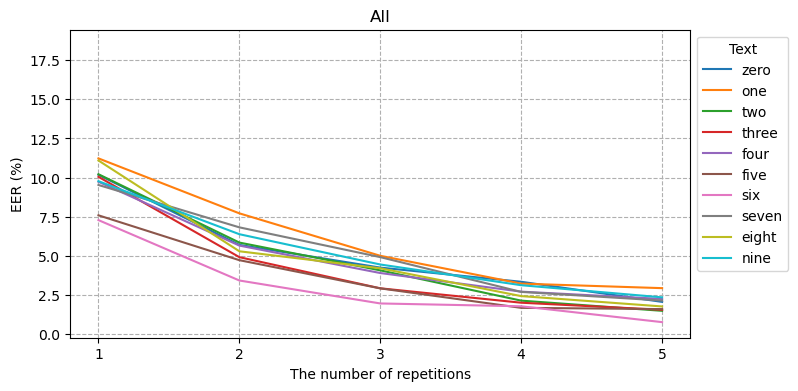

sync_result/images/128_pretrain
128_pretrain


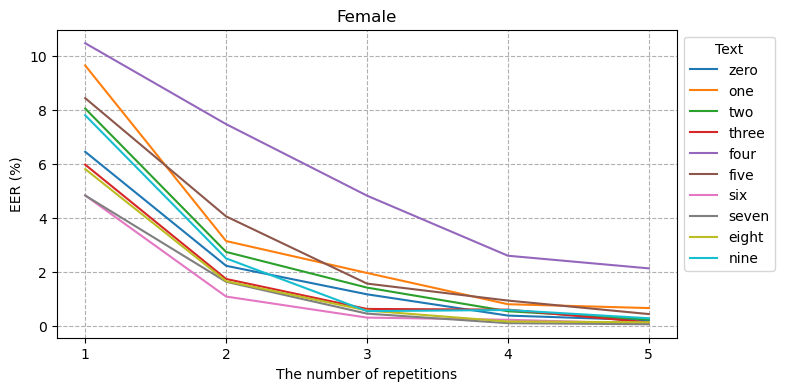

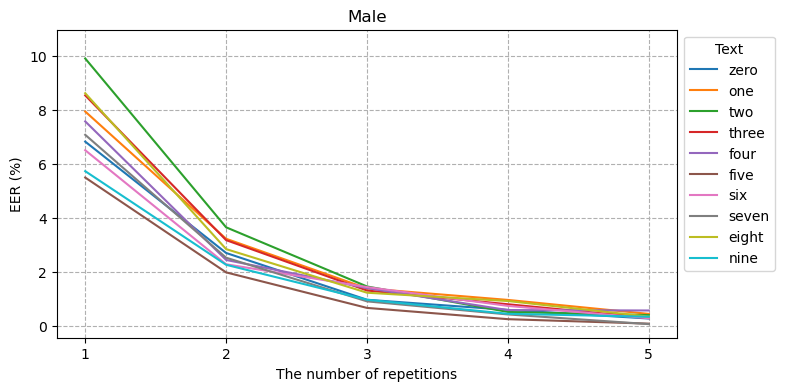

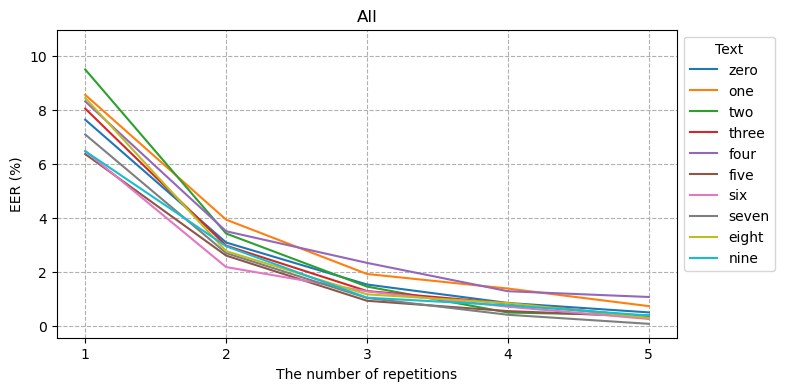

sync_result/images/64_non_pretrain
64_non_pretrain


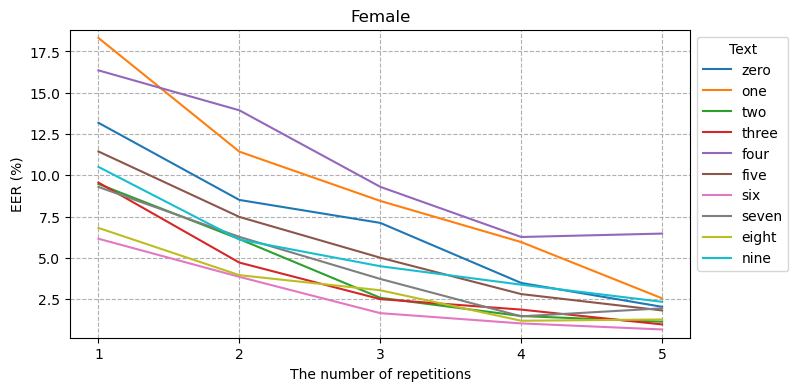

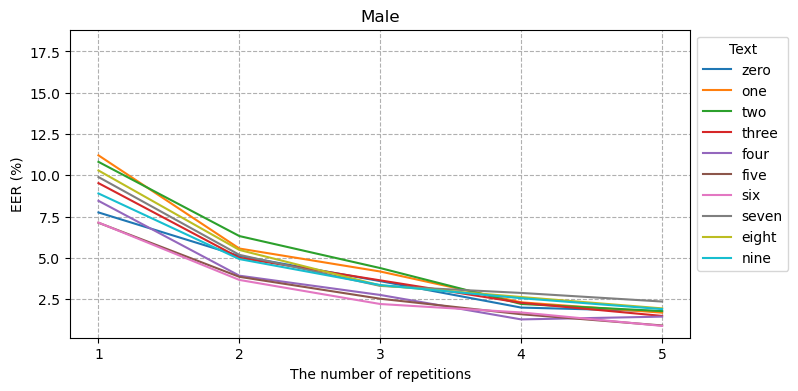

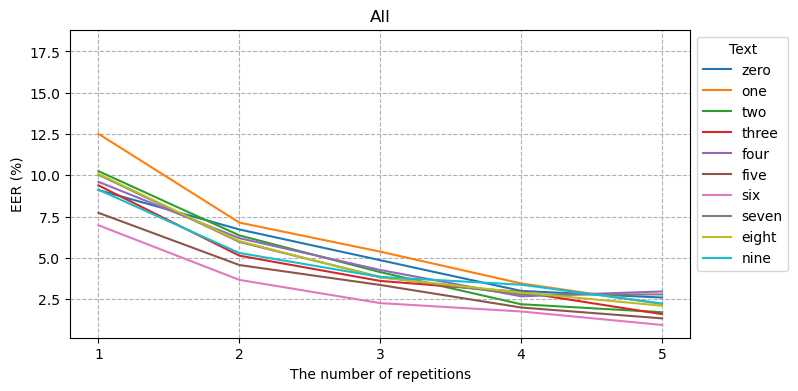

sync_result/images/64_pretrain
64_pretrain


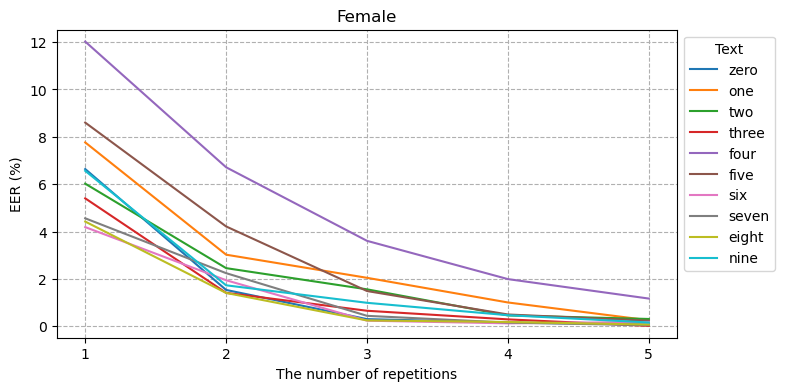

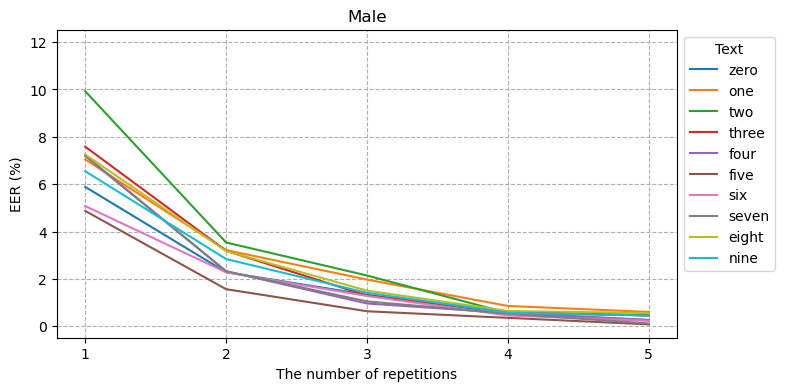

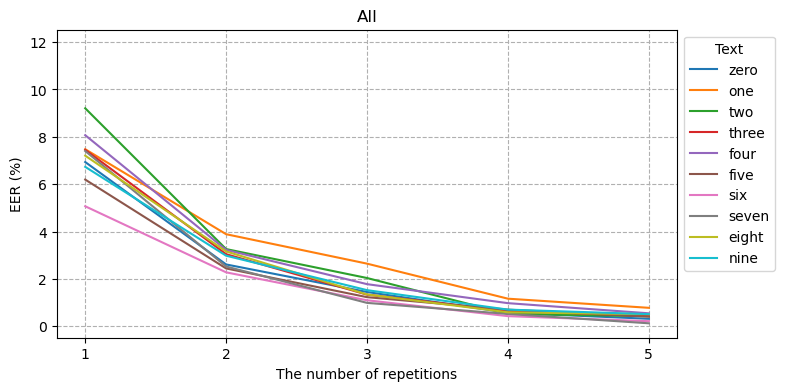

In [18]:
channels = [1024,128,64]
techniques = ['non_pretrain','pretrain']
for c in channels:
    for tech in techniques:
        key = '%s_%s' % (c, tech)
        if tech == 'non_pretrain':
            files = glob.glob(os.path.join(PATH, tech, "%s_%s_exp*.json"%(c,'non-pretrained')))
        else:
            files = glob.glob(os.path.join(PATH, tech, "%s_%s_exp*.json"%(c,'pretrained')))
        path_to_save = os.path.join(PATH,'images',key)
        print(path_to_save)
        average = compute_average_result(files,
                                         type='json')
        print(key)
        visualize_result(average,path_to_save=path_to_save,limit=True)

In [48]:
def draw_bar_chart(filter,path_to_save=None):
    param = [-0.2, 0, +0.2]
    plt.figure(figsize=(12,6))
    # plt.grid(zorder=-1,linestyle='--')
    # data_vis = dict(sorted(filter[gender][metric].items(), key=lambda item: item[1]))
    plt.bar(np.arange(len(filter['female']['eer'])) - 0.2, list(filter['female']['eer'].values()),width=0.2)
    plt.bar(np.arange(len(filter['male']['eer'])), list(filter['male']['eer'].values()),width=0.2)
    plt.bar(np.arange(len(filter['all']['eer']))  +0.2, list(filter['all']['eer'].values()),width=0.2)
    plt.xlabel('Text',fontsize=12)
    plt.ylabel('EER (%)',fontsize=12)
    plt.legend(['Female', 'Male', 'All'], loc='upper left')
    plt.xticks(ticks=range(len(filter['female']['eer'])),labels=[ '_'.join([DIGIT_MAPPING[int(i)] for i in text.split('_')]) for text in list(filter['female']['eer'].keys())],fontsize=8, rotation=60)
    if path_to_save is not None:
        plt.savefig(path_to_save,bbox_inches='tight')
    plt.show()

In [8]:
def get_loop_from_average(average,loop,digits):
    result = {}
    for phase in average:
        result[phase] = {}
        for gender in average[phase]:
            result[phase][gender]= {}
            for metric in average[phase][gender]:
                result[phase][gender][metric] = {}
                if digits is not None:
                    for text in digits:
                        result[phase][gender][metric][text] = average[phase][gender][metric][text][loop-1]
                else:
                    for text in average[phase][gender][metric]:
                        result[phase][gender][metric][text] = average[phase][gender][metric][text][loop-1]
    return result

['sync_result/pretrain/1024_pretrained_exp2.json', 'sync_result/pretrain/1024_pretrained_exp1.json', 'sync_result/pretrain/1024_pretrained_exp3.json']


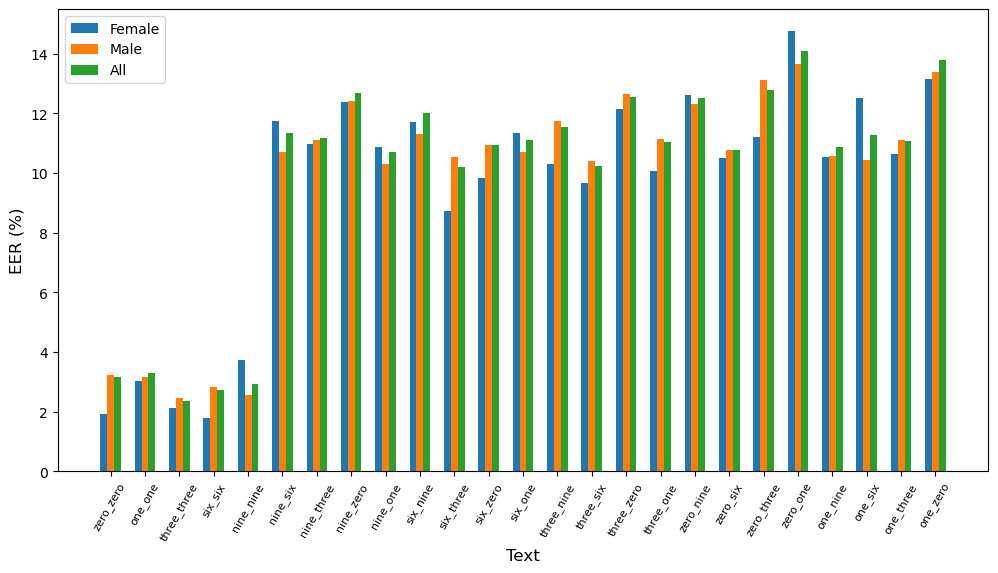

['sync_result/pretrain/128_pretrained_exp2.json', 'sync_result/pretrain/128_pretrained_exp1.json', 'sync_result/pretrain/128_pretrained_exp3.json']


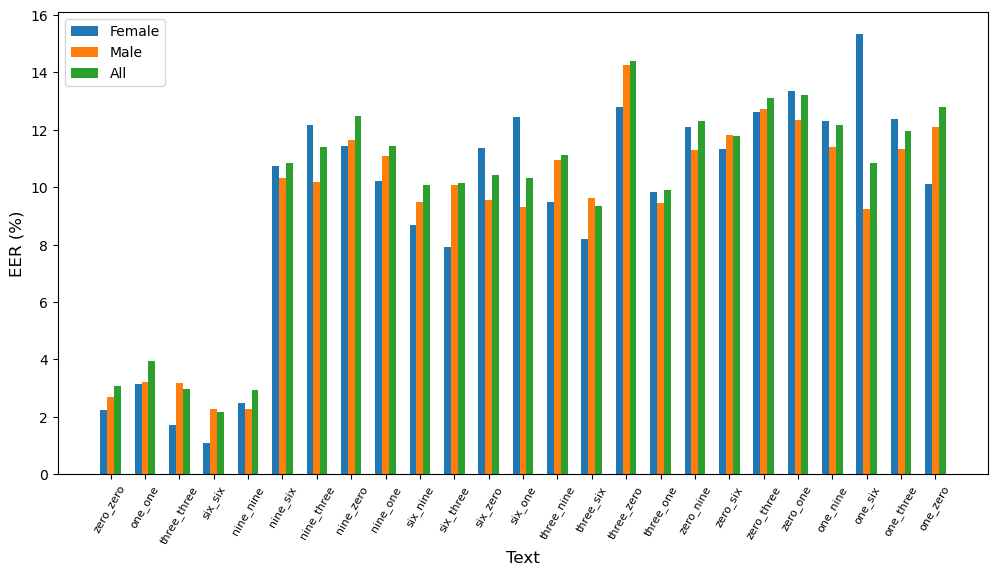

In [51]:
# Experiments
loop = 2
PATH = 'sync_result'
channels = [1024,128]
techniques = ['pretrain']
genders = ['female', 'male', 'all']
phases = ['eval']
digits = ['9', '6', '3', '0','1']
words = list(permutations(digits,r=2))
text = digits + ['_'.join(word) for word in words]
for c in channels:
    for tech in techniques:
        key = '%s_%s' % (c, tech)
        files = glob.glob(os.path.join(PATH, tech, "%s_%s_exp*.json"%(c,'experiment')))
        # print(files)
        # path_to_save = os.path.join(PATH,'new_images',key)
        average_1 = compute_average_result(files, type='json')
        
        if tech == 'non_pretrain':
            files = glob.glob(os.path.join(PATH, tech, "%s_%s_exp*.json"%(c,'non-pretrained')))
        else:
            files = glob.glob(os.path.join(PATH, tech, "%s_%s_exp*.json"%(c,'pretrained')))
        print(files)
        average_2 = compute_average_result(files,type='json')
        loop2 = get_loop_from_average(average_2,2,digits=digits)
        
        for gender in ['female', 'male', 'all']:
            for digit in sorted(digits):
                loop2['eval'][gender]['eer']['%s_%s'%(digit,digit)] = loop2['eval'][gender]['eer'][digit]
                del loop2['eval'][gender]['eer'][digit]
            loop2['eval'][gender]['eer'].update(average_1['eval'][gender]['eer'])
            loop2['eval'][gender]['minDCF'].update(average_1['eval'][gender]['minDCF'])
        path_to_save = os.path.join(PATH,'new_images/loop2',key + '_loop_and_concat.png')
        # print(average_1)
        draw_bar_chart(loop2['eval'],path_to_save=path_to_save)
        # draw_bar_chart(get_loop_from_average(average_2,1)['eval'])
        # print(average_2)
        


# Visualization spoken digits from the difference of channel

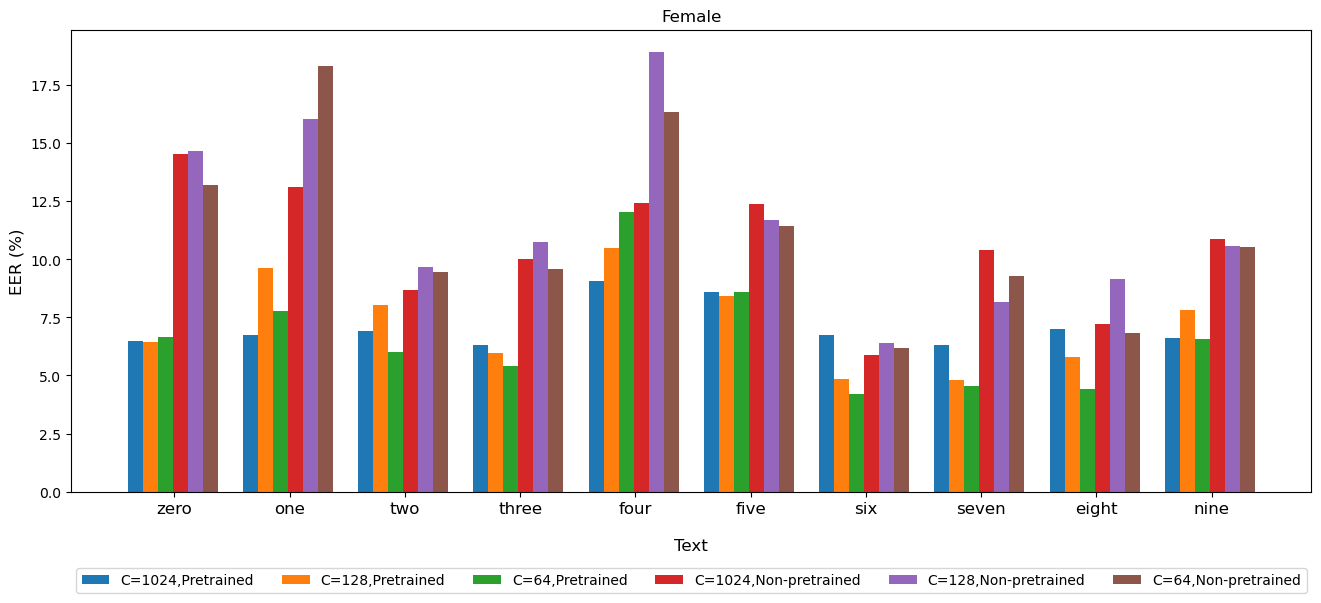

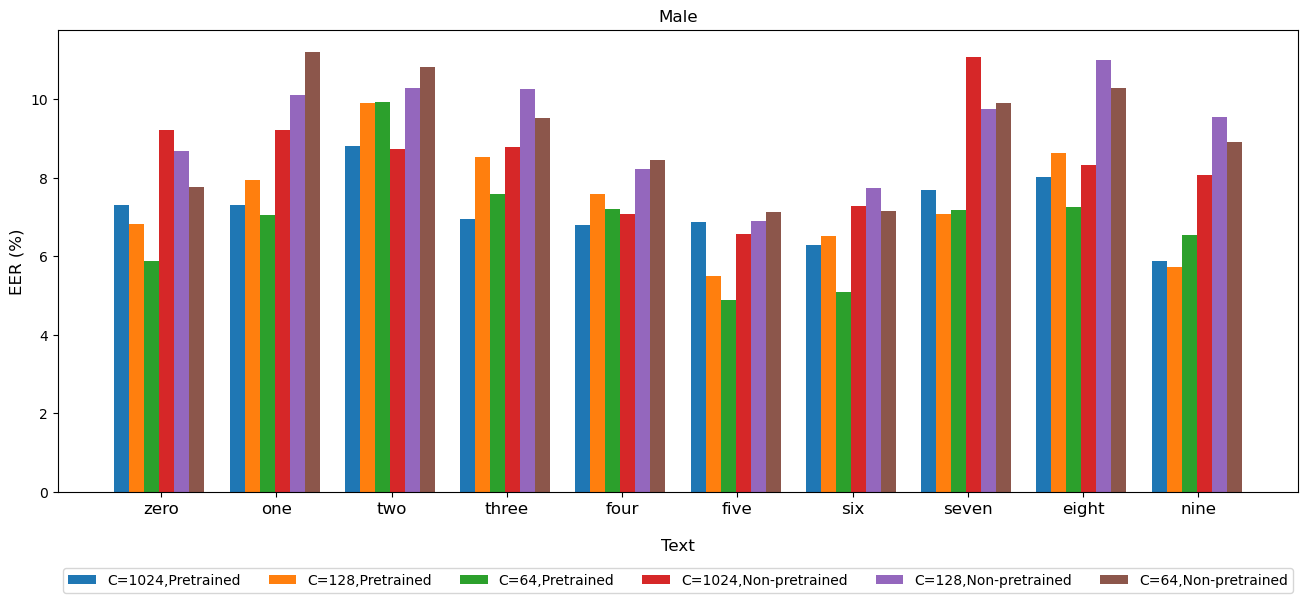

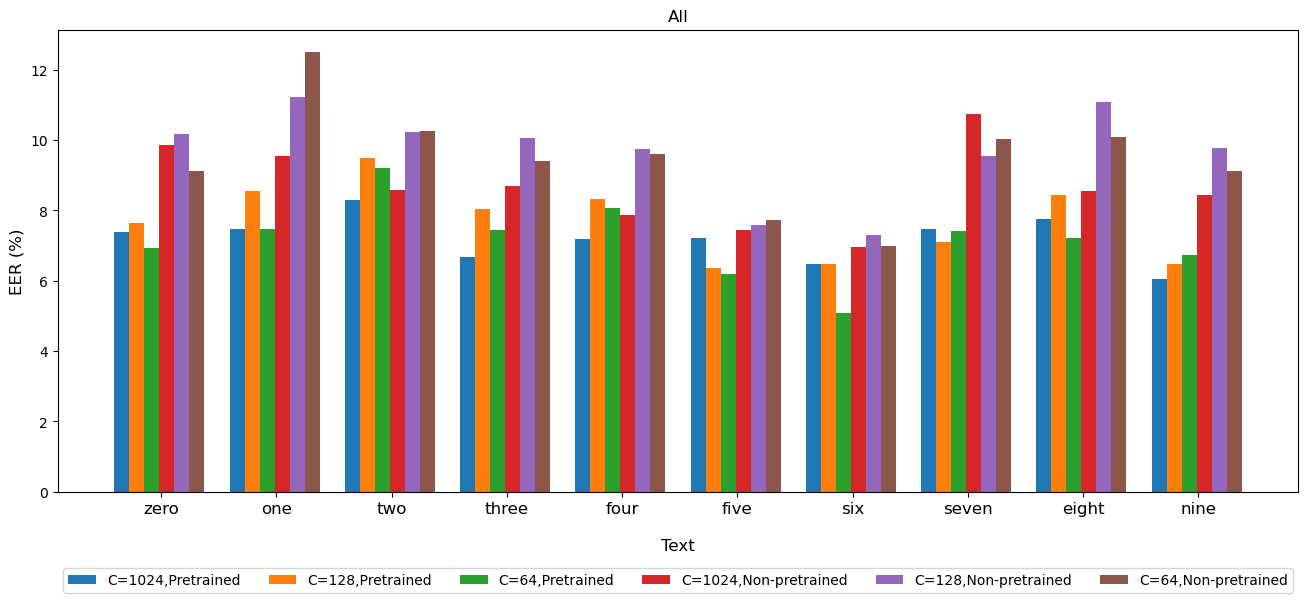

In [80]:
# Experiments
PATH = 'sync_result'
channels = [1024,128,64]
techniques = ['pretrain','non_pretrain']
genders = ['female', 'male', 'all']
phases = ['eval']
data = {}
for tech in techniques:
    for c in channels:
        key = '%s_%s' % (c, tech)
        files = glob.glob(os.path.join(PATH, tech, "%s_%s_exp*.json"%(c,'experiment')))
        if tech == 'non_pretrain':
            files = glob.glob(os.path.join(PATH, tech, "%s_%s_exp*.json"%(c,'non-pretrained')))
        else:
            files = glob.glob(os.path.join(PATH, tech, "%s_%s_exp*.json"%(c,'pretrained')))
        average_loop1 = compute_average_result(files,type='json')
        loop1 = get_loop_from_average(average_loop1,1,digits=None)
        data['%s_%s'%(c,tech)] = loop1['eval']
        


bar_width = 0.13
group_spacing = 0.2
len_columns = 10 # 10 digits
len_groups = len(list(data.keys()))
for gender in genders:
    align = -(len_groups*bar_width)/2 + 0.05
    fig = plt.figure(figsize=(16,6))
    axis = fig.add_subplot()
    for (i,c) in enumerate(data):
        axis.bar(np.arange(len(data[c][gender]['eer']))  + align, list(data[c][gender]['eer'].values()),width=bar_width)
        align = align + bar_width  
    legends = []
    for k in data.keys():
        pattern = 'C=%s,%s'
        tech = 'Non-pretrained' if 'non_pretrain' in k else 'Pretrained'
        c = k.split('_')[0]
        legends.append(pattern%(c,tech))
    axis.set_xlabel('Text',fontsize=12)
    axis.xaxis.set_label_coords(0.5,-0.1)
    axis.set_ylabel('EER (%)',fontsize=12)
    axis.legend(legends, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=6)
    texts = [i for i in range(10)]
    # axis.set_xticklabels([DIGIT_MAPPING[text] for text in texts],fontsize=12, rotation=30)
    # axis.set_xticks(np.arange(len_columns)+ ((len_groups - 1) / 2)*(bar_width * len_columns) + group_spacing)
    plt.xticks(ticks=range(10),labels=[DIGIT_MAPPING[text] for text in texts],fontsize=12, rotation=0)
    plt.title(gender.capitalize())
    plt.savefig('sync_result/new_images/comparison_%s.png'%gender,bbox_inches='tight')
    plt.show()

# Compare pretrained and non-pretrained

In [18]:
PATH = 'sync_result'
channels = [1024,128,64]
techniques = ['pretrain','non_pretrain']
genders = ['female', 'male', 'all']
phases = ['eval']
data = {}
for c in channels:
    data[c] = {}
    for tech in techniques:
        key = '%s_%s' % (c, tech)
        files = glob.glob(os.path.join(PATH, tech, "%s_%s_exp*.json"%(c,'experiment')))
        if tech == 'non_pretrain':
            files = glob.glob(os.path.join(PATH, tech, "%s_%s_exp*.json"%(c,'non-pretrained')))
        else:
            files = glob.glob(os.path.join(PATH, tech, "%s_%s_exp*.json"%(c,'pretrained')))
        average = compute_average_result(files,type='json')['eval']
        # loop1 = get_loop_from_average(average_loop1,1,digits=None)
        # data['%s_%s'%(c,tech)] = loop1['eval']
        data[c][tech] = average
        

def visualize_result_by_goal(data, 
                            goal='techniques',
                            metric='eer', 
                            start_loop=1, 
                            end_loop=5,
                            channels=[1024,128,64],
                            genders=['female', 'male', 'all'],
                            techniques=['non_pretrain', 'pretrain']):
    # assert goal in ['techniques' 'genders']
    for c in channels:
        for gender in genders:
            if goal == 'techniques':
                all = []
                for tech in techniques:
                    if len(all) == 0:
                        all = np.array(list(data[c][tech][gender][metric].values()))
                    else:
                        all = np.concatenate([all,np.array(list(data[c][tech][gender][metric].values()))], axis=0)
                min_ = np.min(all)
                max_ = np.max(all)
            for tech in techniques:
                if goal == 'genders':
                    all = []
                    for g in genders:
                        if len(all) == 0:
                            all = np.array(list(data[c][tech][g][metric].values()))
                        else:
                            all = np.concatenate([all,np.array(list(data[c][tech][g][metric].values()))], axis=0)
                    min_ = np.min(all)
                    max_ = np.max(all)
                # print(c, gender, tech)
                fig = plt.figure(figsize=(8,4))
                ax = fig.add_subplot(111)
                for i in range(0,10):
                    try:
                        ax.plot([j for j in range(start_loop, end_loop+1)],data[c][tech][gender][metric][i])
                    except:
                        ax.plot([j for j in range(start_loop, end_loop+1)],data[c][tech][gender][metric][str(i)])
                ax.set_xticks([ i for i in range(start_loop,end_loop+1)])
                ax.set_xlabel('The number of repetitions')
                ax.set_ylim((min_-0.5,max_+0.5))
                if metric == 'eer':
                    y_label = 'EER (%)'
                else:
                    y_label = 'minDCF'

                ax.set_ylabel(y_label)
                ax.set_title(gender.capitalize())
                ax.grid(linestyle='--')
                # ax.legend([DIGIT_MAPPING[i] for i in range(0,10)], loc='upper left', ncol=1, bbox_to_anchor=[1,1], title='Text')
                plt.legend([DIGIT_MAPPING[i] for i in range(0,10)], loc='upper left', ncol=1, bbox_to_anchor=[1,1], title='Text')
                
                path_folder = os.path.join(PATH, 'new_images', goal)
                if not os.path.exists(path_folder):
                    os.mkdir(path_folder)
                path_to_save = os.path.join(path_folder,'%s_%s_%s.png'%(c,tech,gender))
                if path_to_save is not None:
                    plt.savefig(path_to_save, bbox_inches='tight')
                plt.show()


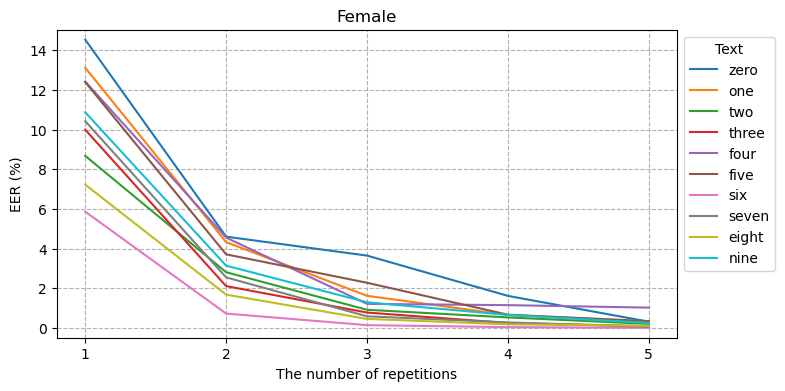

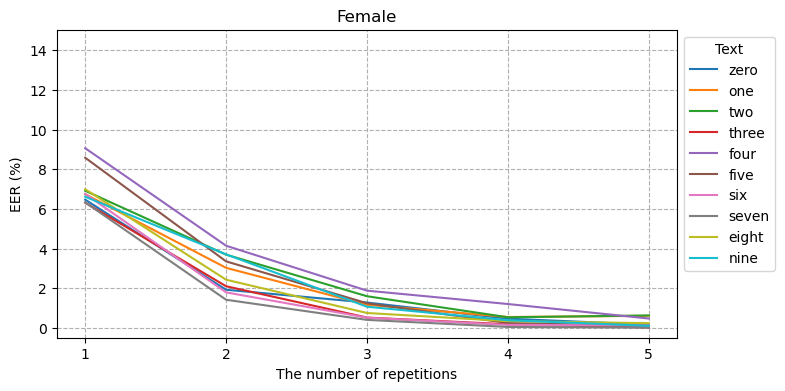

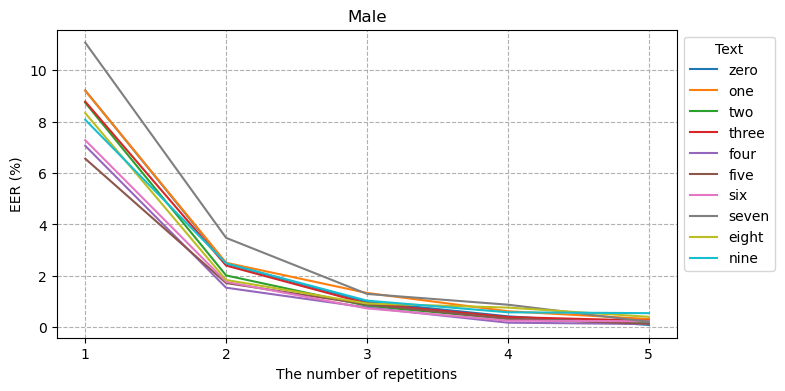

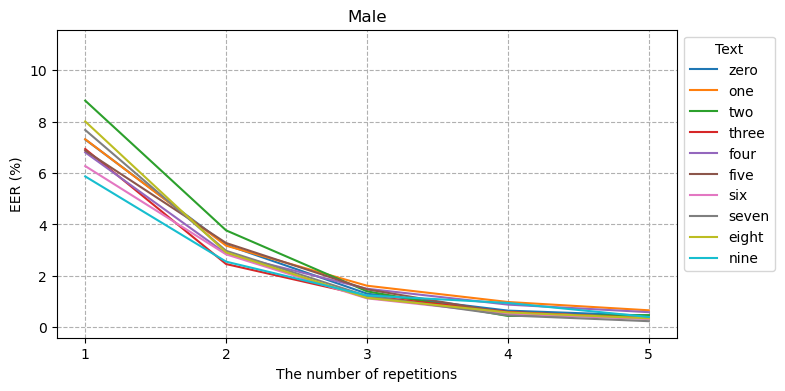

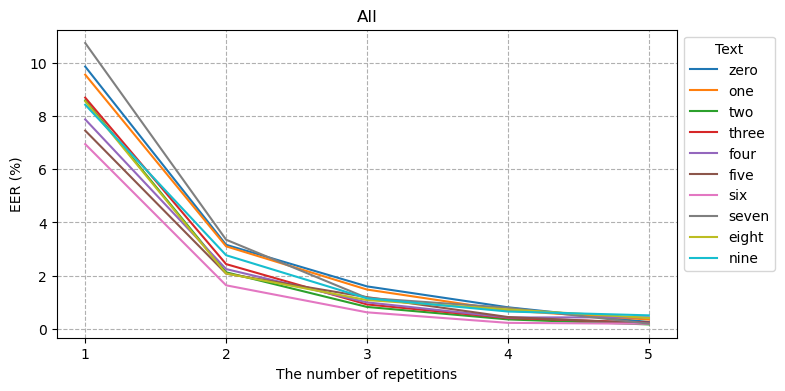

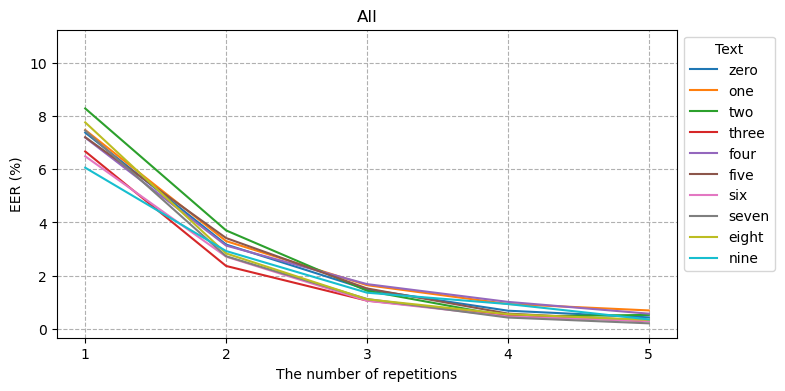

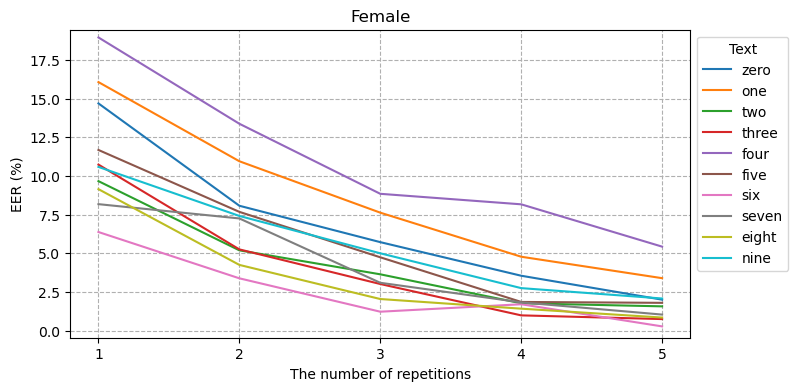

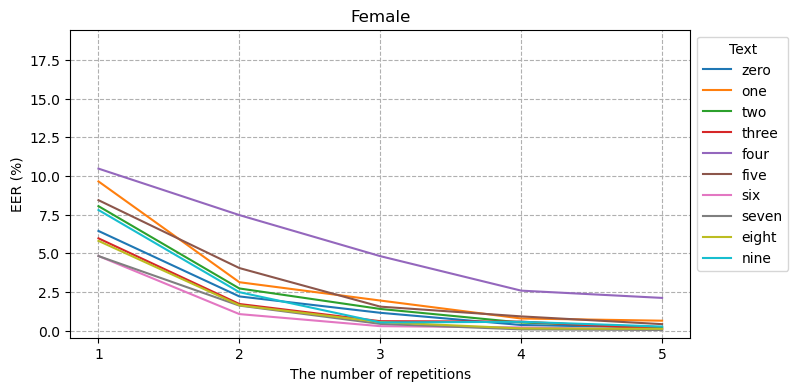

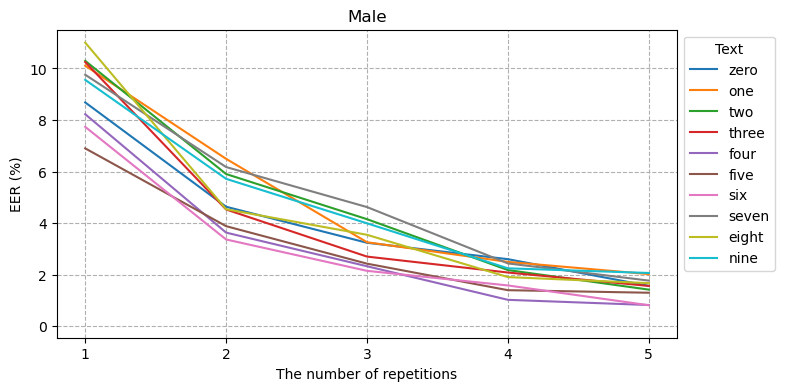

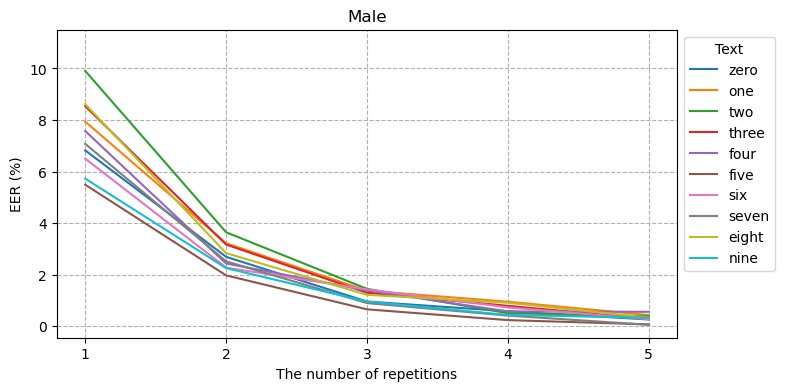

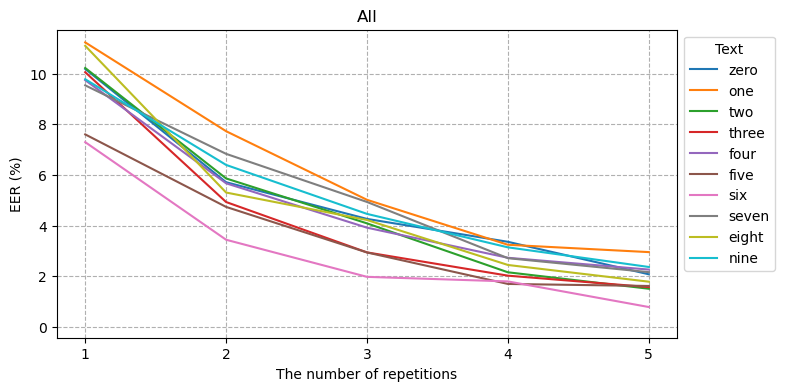

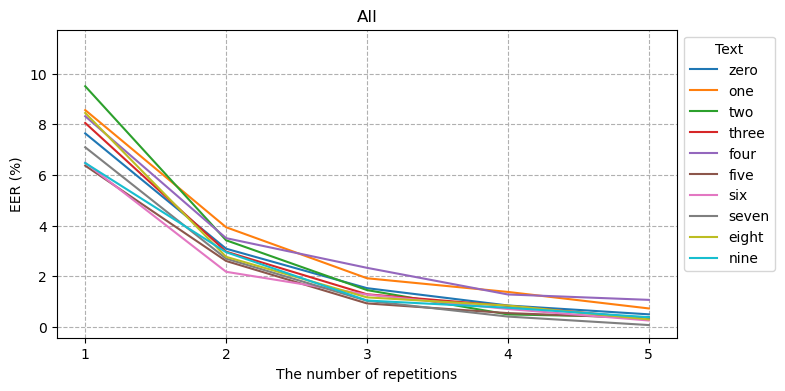

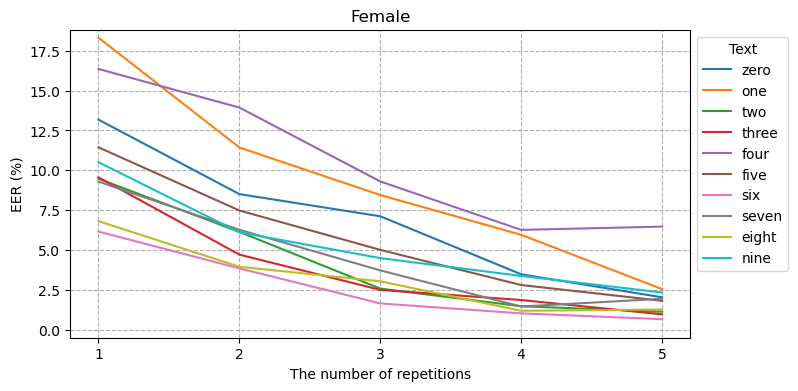

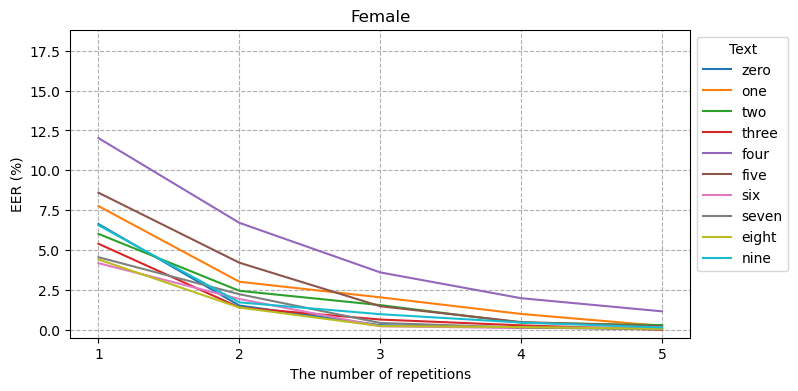

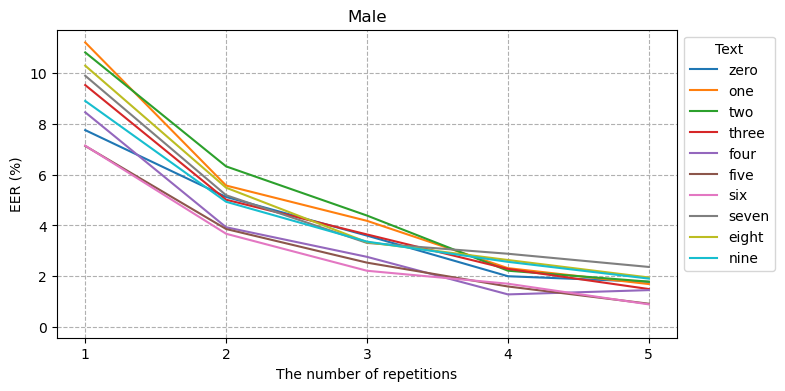

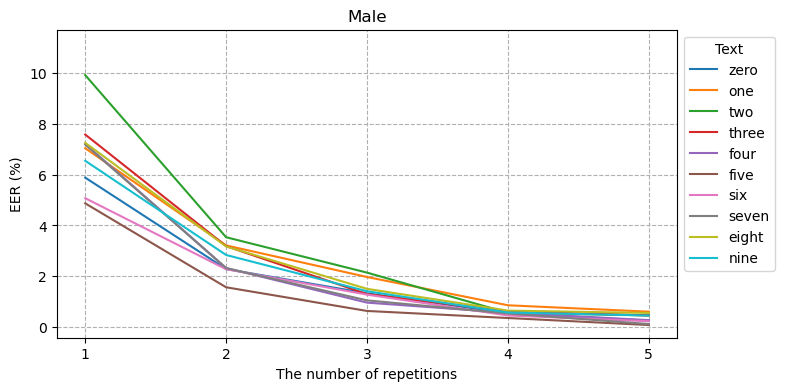

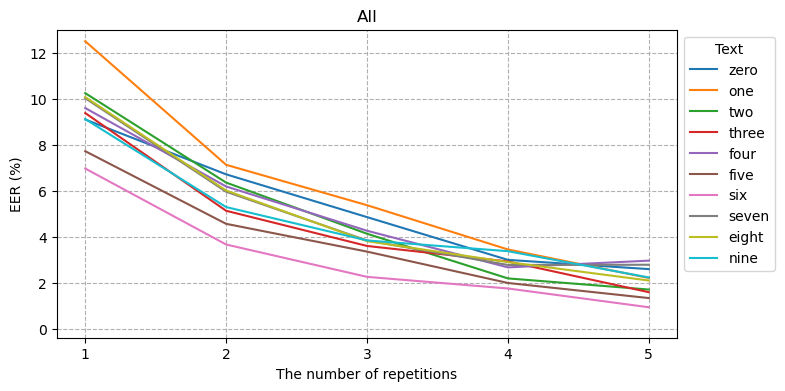

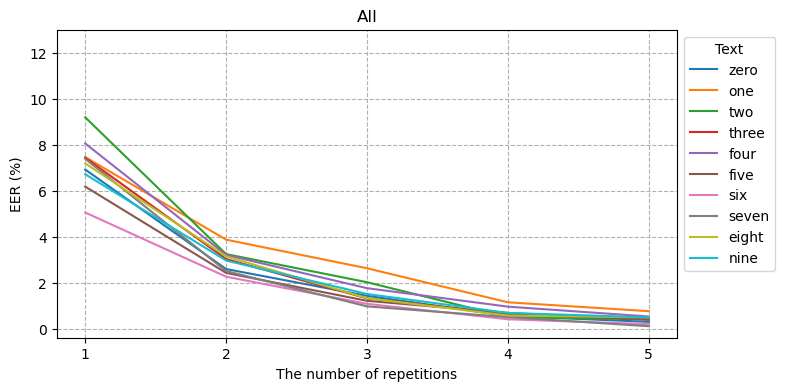

In [19]:
visualize_result_by_goal(data,goal='techniques')

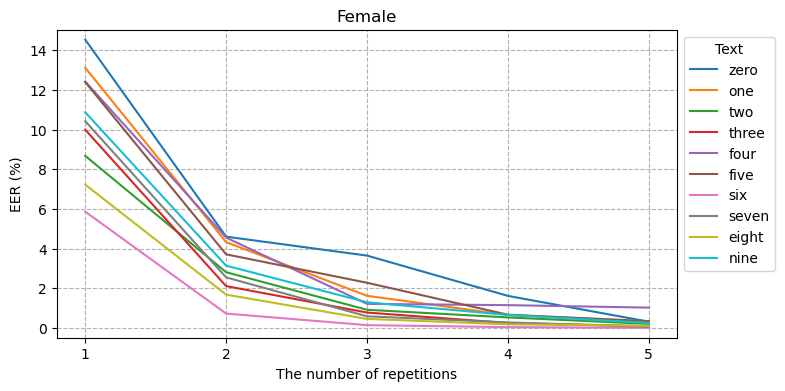

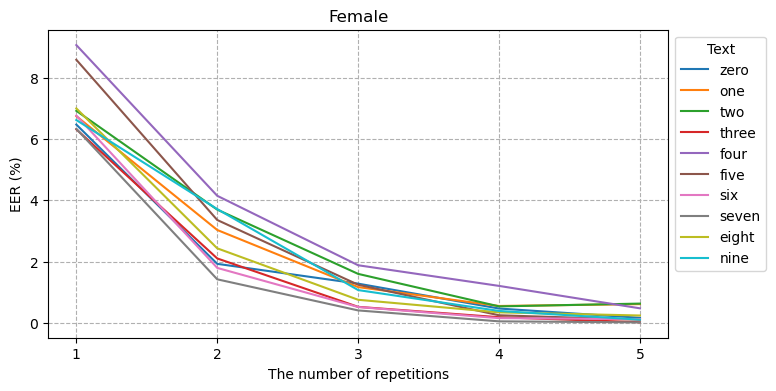

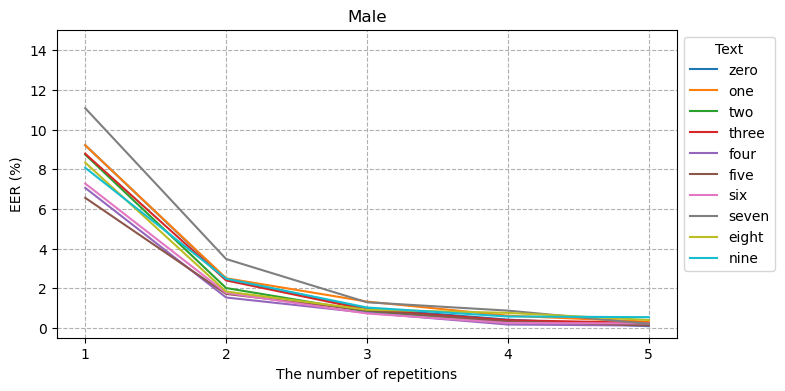

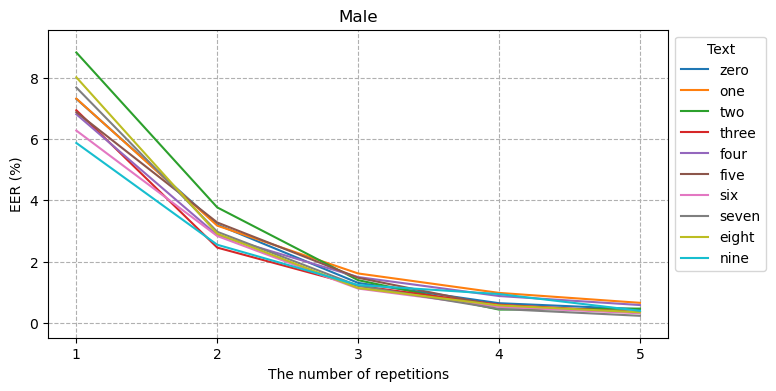

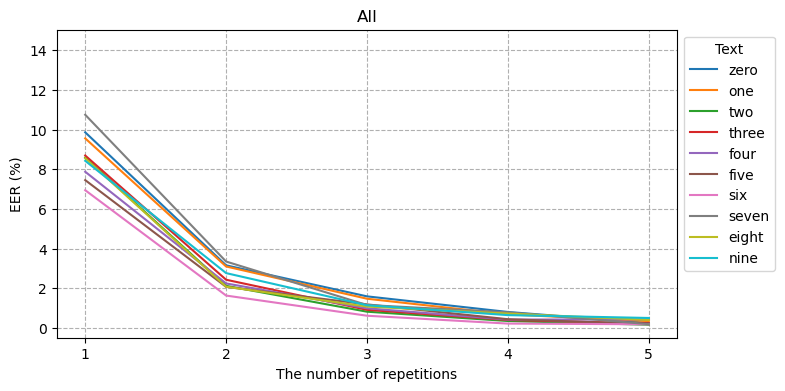

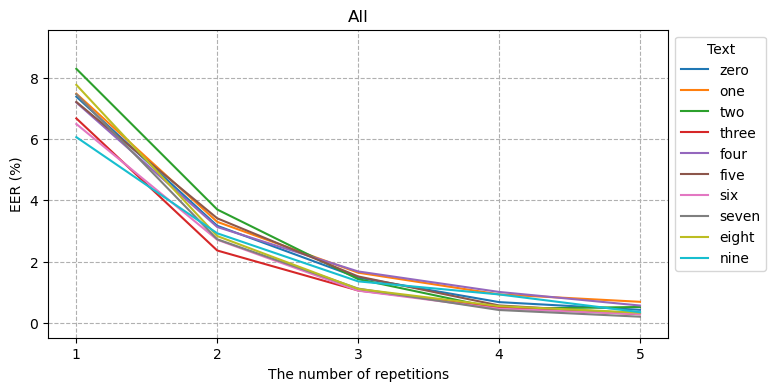

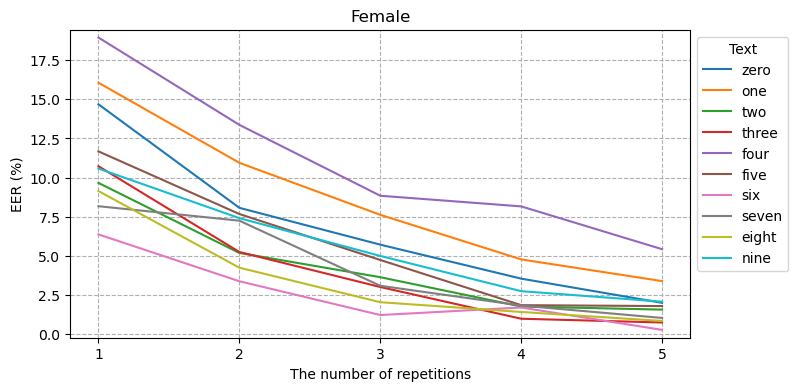

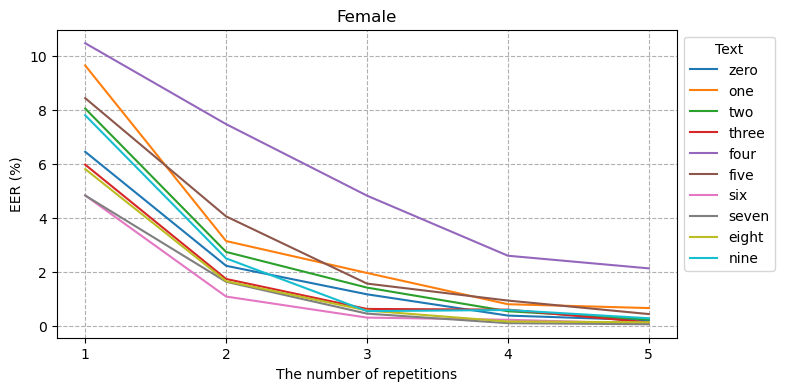

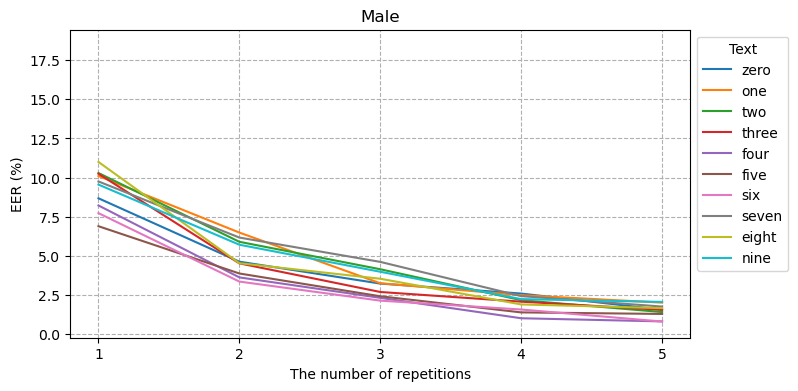

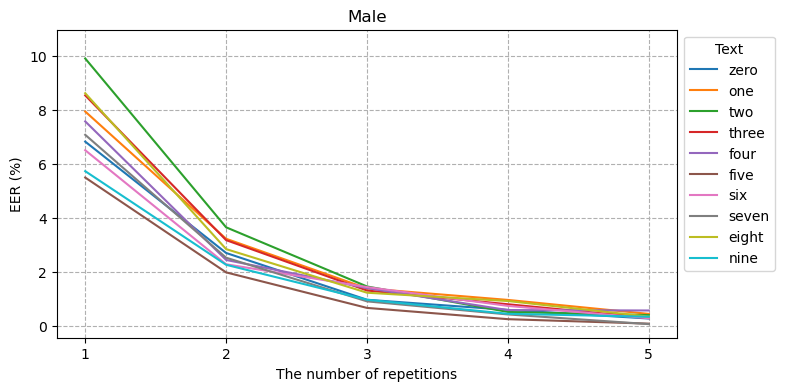

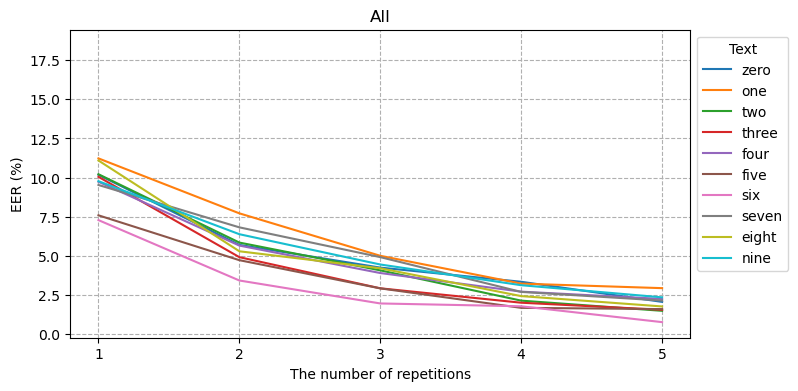

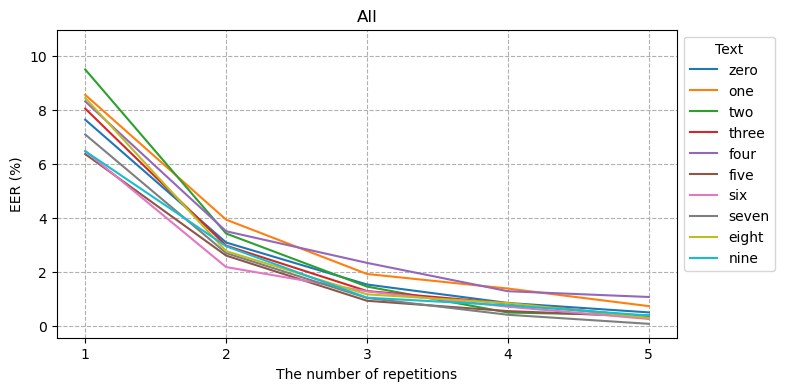

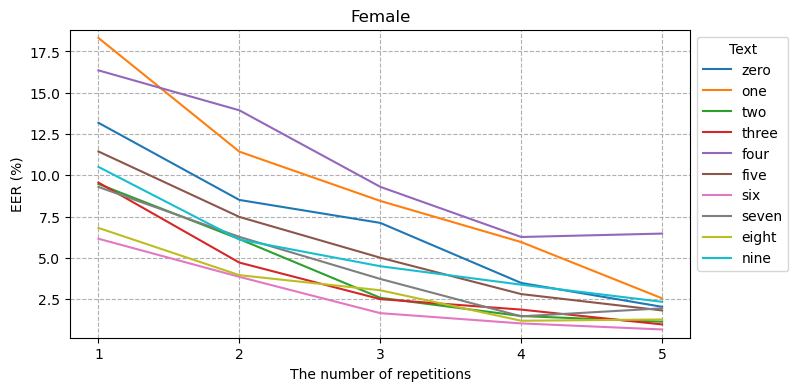

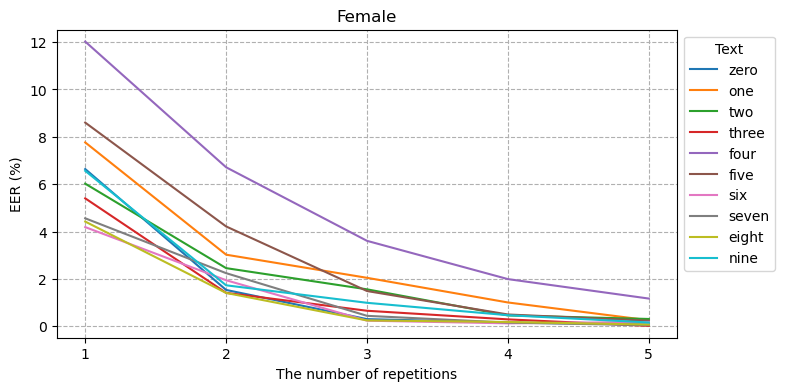

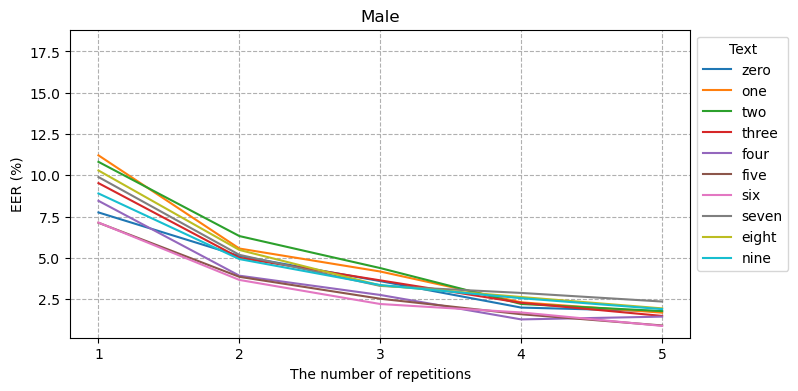

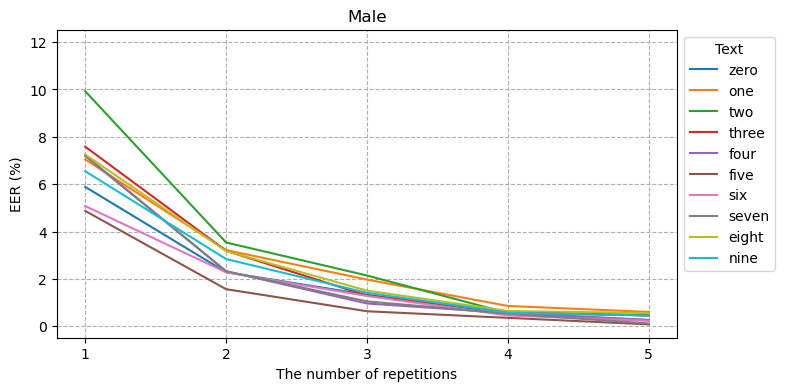

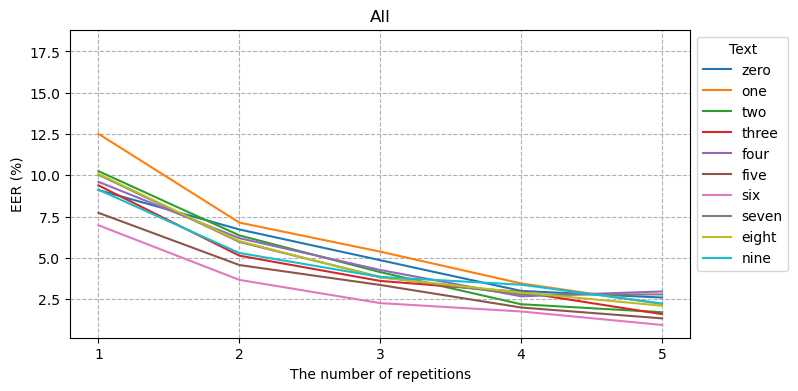

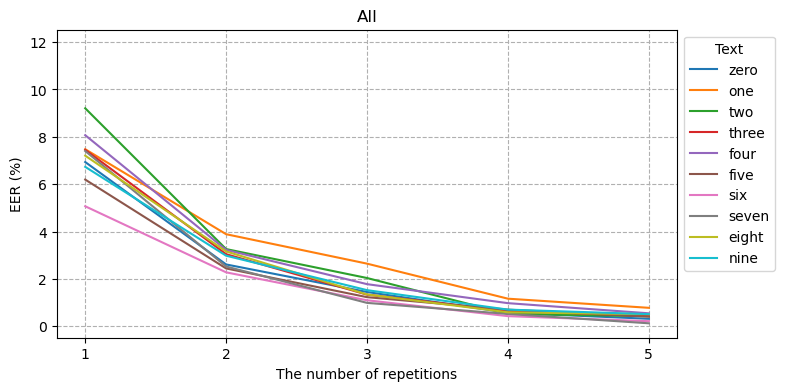

In [20]:
visualize_result_by_goal(data, goal='genders')

# Real data

In [38]:
PATH = 'sync_result/real_data'
channels = [1024,128,64]
# techniques = ['non_pretrain','pretrain']
result = {}
for c in channels:
    for tech in ['non-pretrained', 'pretrained']:
        path_to_save = os.path.join(PATH,'images','%s_%s_tw.png'%(c,tech))
        if c == 1024 and tech == 'pretrained':
            average = json.load(open(PATH + '/1024_pretrained_tw.json', 'r'))
            # visualize_result(average,genders=['male'],
            #              path_to_save=path_to_save,limit=True)
            result["%s_%s"%(c,tech)] = np.mean(np.array(list(average['eval']['male']['eer'].values())),axis=0)
            continue
        files = glob.glob(os.path.join(PATH, 'temp', "%s_%s_exp*.json"%(c,tech)))
        print(path_to_save)
        average = compute_average_result(files,
                                         type='json')
        avg_loop = np.array(list(average['eval']['male']['eer'].values()))
        result["%s_%s"%(c,tech)] = np.mean(avg_loop, axis=0)
        # json.dump(average, open(os.path.join(PATH,'%s_%s_tw.json'%(c,tech)), 'w'))
        # # print(key)
        # visualize_result(average,genders=['male'],
        #                  path_to_save=path_to_save,limit=True)

sync_result/real_data/images/1024_non-pretrained_tw.png
sync_result/real_data/images/128_non-pretrained_tw.png
sync_result/real_data/images/128_pretrained_tw.png
sync_result/real_data/images/64_non-pretrained_tw.png
sync_result/real_data/images/64_pretrained_tw.png


In [39]:
result

{'1024_non-pretrained': array([13.26023392,  7.76851852,  5.88499025,  5.04141702,  5.99815241]),
 '1024_pretrained': array([7.85721248, 4.5462963 , 3.19736842, 2.66002643, 3.63669673]),
 '128_non-pretrained': array([12.98489279,  9.66666667,  7.11159844,  8.8539686 ,  7.66289085]),
 '128_pretrained': array([8.64863548, 4.91666667, 3.23635478, 3.61420849, 3.55864603]),
 '64_non-pretrained': array([12.27436647,  9.88888889,  7.28411306,  8.27279984,  8.40952959]),
 '64_pretrained': array([8.56676413, 5.43518519, 3.57699805, 4.38272701, 4.9451952 ])}

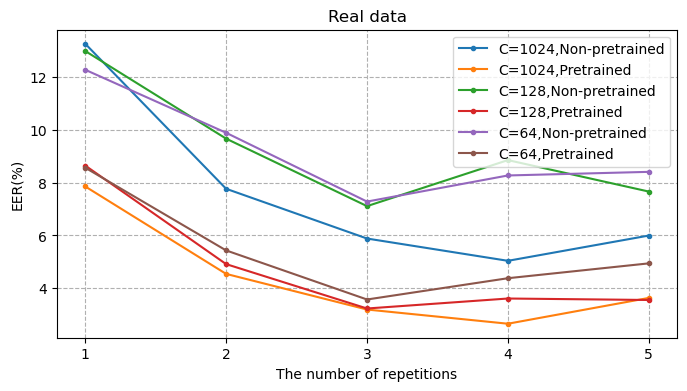

In [42]:
data = result
legends = []
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
for k in data:
    leg = 'C=%s,%s'
    if 'non-pretrained' in k:
        tech_str = 'Non-pretrained'
    else:
        tech_str = 'Pretrained'
    
    C = k.split('_')[0]
    legends.append(leg%(C,tech_str))
    ax.plot([loop for loop in range(1,6)],list(data[k]),marker='.')
plt.title('Real data')
plt.ylabel('EER(%)')
plt.xlabel('The number of repetitions')
plt.xticks([loop for loop in range(1,6)])
plt.legend(legends)
plt.grid(linestyle='--')
plt.savefig('sync_result/real_data/images/comparison.png')
plt.show()